In [1]:
#Lib imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
plt.style.use('default')
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('muted')
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import confusion_matrix
import sys, os, io, string, shutil, math
import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA 
from sklearn import preprocessing
import scipy.linalg as la
import re
#from tabulate import tabulate
from scipy import stats
#import pickle
import pickle5 as pickle
from sklearn.utils import shuffle

tf.__version__


def tryint(s):
    try:
        return int(s)
    except ValueError:
        return s
     
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    st = [ tryint(c) for c in re.split('([0-9]+)', s) ]
    #print(st)
    return st

def tryfloat(s):
    try:
        return float(s)
    except ValueError:
        return s

def alphanum_key_scientific(s):
    """ Turn a string into a list of string and number chunks.
        "P0.1MPa_sr1e7" -> [0.1, 10000000.0]
    """
    st = [ tryfloat(n) for n in re.findall("-?[\d.]+(?:e-?\d+)?", s)]
    #print(st)
    return st

#function for creating 3x3 matrix from 7 dims : distance_sqrd, xx_order, yy_order, zz_order, xy_order, yz_order, zx_order
def create_3_3_matrix(input_data):
    output = []
    for i in range(input_data.shape[0]):
        temp = np.array([[input_data[i][1],input_data[i][4],input_data[i][6],input_data[i][4],input_data[i][2],input_data[i][5],input_data[i][6],input_data[i][5],input_data[i][3]]])
        temp = np.reshape(temp, (-1,3,3))
        if i==0:
            output = temp
        else:
            output = np.append(output, temp, axis=0)
    return output

def print_eignvalues_for_a_pair(input_data, ylabel_text, pair_choise = 28):
  test = input_data[[i+pair_choise for i in range(0, input_data.shape[0], int(input_data.shape[0]/len(ylabel_text)))]]
  for i in range (len(ylabel_text)):
    data_for_eigen = create_3_3_matrix(test)
    print("Data for: ", ylabel_text[i])
    print("Distance sqd matrix: ")
    print(data_for_eigen[i])
    #The normalized (unit “length”) eigenvectors, 
    #such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
    u, V = la.eigh(data_for_eigen[i])
    #print(np.abs(np.dot(V,np.dot(np.diag(u), la.inv(V)))))
    print("Eigen values: ")
    print(u)
    print("Eigen vectors: ")
    print(V)
    cos_inv_vals = np.degrees(np.arccos(V))
    cos_inv_vals[cos_inv_vals > 90] = 180 - cos_inv_vals[cos_inv_vals > 90]
    print("Eigen vectors in degress: ")
    print(cos_inv_vals)
    print("------------------------------------------------")
    

### pair base study

def get_all_physical():
  pair_wanted_all_physical = ['1-3', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '7-9', '9-10', '10-11', '11-12', '12-13', '12-14', '14-15', '15-16', '16-17', '17-18', '18-19', '18-20', '20-21', '21-22', '22-23', '23-24', '23-25', '26-27', '27-28', '28-29', '28-30']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_all_pairs():
  pair_wanted_all_ = []
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
        pair_wanted_all_.append(str(i)+"-"+str(j))
  return pair_wanted_all_


def get_far_apart_indexes(atom_distance = 10.0):
  pair_wanted_all_ = []
  pair_wanted_all_indx = []
  count=0
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
        if abs(i-j) >= atom_distance:
            pair_wanted_all_.append(str(i)+"-"+str(j))
            pair_wanted_all_indx.append(count)
        count +=1
  return pair_wanted_all_, pair_wanted_all_indx


def get_far_apart_filter_indexes(atom_distance_low = 15.0, atom_distance_high = 30.0):
  if atom_distance_low>atom_distance_high:
    print("This is a band pass filter, low cant be higher than high")
    return

  pair_wanted_all_ = []
  pair_wanted_all_indx = []
  count=0
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
        if abs(i-j) >= atom_distance_low and abs(i-j) <= atom_distance_high:
            pair_wanted_all_.append(str(i)+"-"+str(j))
            pair_wanted_all_indx.append(count)
        count +=1
  return pair_wanted_all_, pair_wanted_all_indx


def get_all_dihedral_indx():
  pair_wanted_all_dihedral = ['1-5', '3-5', '2-6']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['4-7']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['5-8']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['5-9']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['6-10']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['8-10']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['7-11']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['9-12']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['10-13']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['10-14']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['11-15']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['13-15']  
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['12-16']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['14-17'] 
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['15-18']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['16-19'] 
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['16-20']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['17-21']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['19-21']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['18-22']  
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['20-23']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['21-24'] 
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['21-25']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['22-26']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['24-26']   
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['23-27']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['25-28']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['26-29']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['26-30']
    
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_dihedral:
      pair_wanted_all_indx.append(i)   
  return pair_wanted_all_dihedral, pair_wanted_all_indx


def get_side_pairs():
  pair_wanted_all_physical = ['7-8', '12-13', '18-19', '23-24']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_end_pairs():
  pair_wanted_all_physical = ['1-3', '2-3', '28-29', '28-30']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_backbone_pairs():
  pair_wanted_all_physical = ['3-4', '11-12', '20-21', '27-28']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_end_end_pairs():
  pair_wanted_all_physical = ['1-30', '1-29', '2-30', '2-29']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

our_data = np.array([
       [-1.43848934e-03, -4.03033332e-04,  1.84152267e-03, -9.45177239e-04, -8.51711140e-06,  1.43122272e-04],
       [-1.00731300e-03,  8.65788162e-05,  9.20734189e-04,-7.32750047e-04,  4.11199488e-04, -5.01451799e-05],
       [-7.36946784e-04, -1.39810267e-03,  2.13504946e-03,1.27058181e-03, -8.39904406e-04,  8.03955537e-04],
       [ 4.18954851e-03, -8.72946192e-03,  4.53991342e-03, 1.12427033e-02, -1.37019021e-03, -1.17958475e-03],
       [ 5.08419367e-03, -1.10730525e-02,  5.98885887e-03, 7.54204524e-03, -3.84489378e-03, -4.50740463e-03]])
print(our_data.shape)

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver = 'full')
transformed_data = pca.fit_transform(our_data)
print(transformed_data)
#print(pca.transform(our_data))
print("Mean values: ",pca.mean_)
print("Variance ratio: ",pca.explained_variance_ratio_)

#[0.9924... 0.0075...]
print("Singular/Eigne values: ", pca.singular_values_)
#[6.30061... 0.54980...]
print("Unit vector components: ", pca.components_)
print("Data x Unit vector components.T: \n", np.dot(our_data - np.mean(our_data, axis=0),pca.components_.T) )

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles


compute_angles_between_x_y_z_for_pc(pca.components_)


base_path= '../1000_files_zero_rates_inter_molecular/'
with open(base_path+'data_dump_with_files_inter_molecular_18.5x2.0.pk', 'rb') as handle:
    data_dump_new = pickle.load(handle)

arr_new, arr_time_series_new, files_dic_new, ylabel_new, ylabel_text_new, pairlabel_new  = data_dump_new

print(arr_new.shape)
print(ylabel_new.shape)
print(len(ylabel_text_new))
print(pairlabel_new.shape)
#arr_time_series_new.keys()

for key, value in arr_time_series_new.items():
    print(key, value.shape)

    


arr, arr_time_series, files_dic, ylabel, ylabel_text, pairlabel = arr_new, arr_time_series_new, files_dic_new, ylabel_new, ylabel_text_new, pairlabel_new 

(5, 6)
[[-0.00686683 -0.00057611]
 [-0.00712497 -0.00010294]
 [-0.00457528  0.00059098]
 [ 0.00883132  0.00314341]
 [ 0.00973576 -0.00305534]]
Mean values:  [ 0.0012182  -0.00430341  0.00308522  0.00367548 -0.00113046 -0.00095801]
Variance ratio:  [0.93068808 0.06353307]
Singular/Eigne values:  [0.01707715 0.00446183]
Unit vector components:  [[ 0.36664538 -0.60470622  0.23806085  0.61246797 -0.16651995 -0.20095442]
 [-0.09381095  0.29077398 -0.19696304  0.68654836  0.34692739  0.52549814]]
Data x Unit vector components.T: 
 [[-0.00686683 -0.00057611]
 [-0.00712497 -0.00010294]
 [-0.00457528  0.00059098]
 [ 0.00883132  0.00314341]
 [ 0.00973576 -0.00305534]]
Component rad deg
PC2-xy - (0.8140652167717641, 46.64250116942456)
PC1-xy - (0.9116174438377039, 52.23183206240479)
PC2-zx - (1.0174958205581406, 58.298216190181996)
PC1-xx - (1.195395603917138, 68.49112295294422)
PC2-yz - (1.2165032951468615, 69.70050457567268)
PC2-yy - (1.2757606543598299, 73.09570116366643)
PC1-zz - (1.330427517

## All systems

-var ratio- [0.72117882 0.15716657]
Component rad deg
PC1-yy - (0.6802999318714199, 38.9783148992698)
PC2-xx - (0.9790201651651484, 56.093723522163785)
PC2-yy - (1.3461684339065356, 77.1297697765802)
PC2-yz - (1.4028990793027896, 80.38019632683883)
PC2-xy - (1.5417788264404988, 88.33741969767364)
PC1-zx - (1.5536844021551472, 89.01955893879644)
PC2-zx - (1.604452064030191, 91.92833169998366)
PC1-xy - (1.6330816984275862, 93.56868891995698)
PC1-yz - (1.7490735397816344, 100.21453188749494)
PC1-zz - (1.79112519899516, 102.62391448195238)
PC1-xx - (2.1637748553684832, 123.9751670291442)
PC2-zz - (2.466388961620329, 141.31367813849843)
(42, 5400)
-var ratio- [0.7189956  0.12504406]
[[-0.01836313  0.025494   -0.00713087 ... -0.00267268 -0.00353877
  -0.00203168]
 [-0.01497544 -0.00892216  0.0238976  ... -0.00500646 -0.00397685
   0.00041957]]
Printing top 20 components
Component rad deg
PC2-15-14,zz - (1.5399731696004404, 88.23396318148936)
PC2-14-15,zz - (1.5400028894754592, 88.23566600489

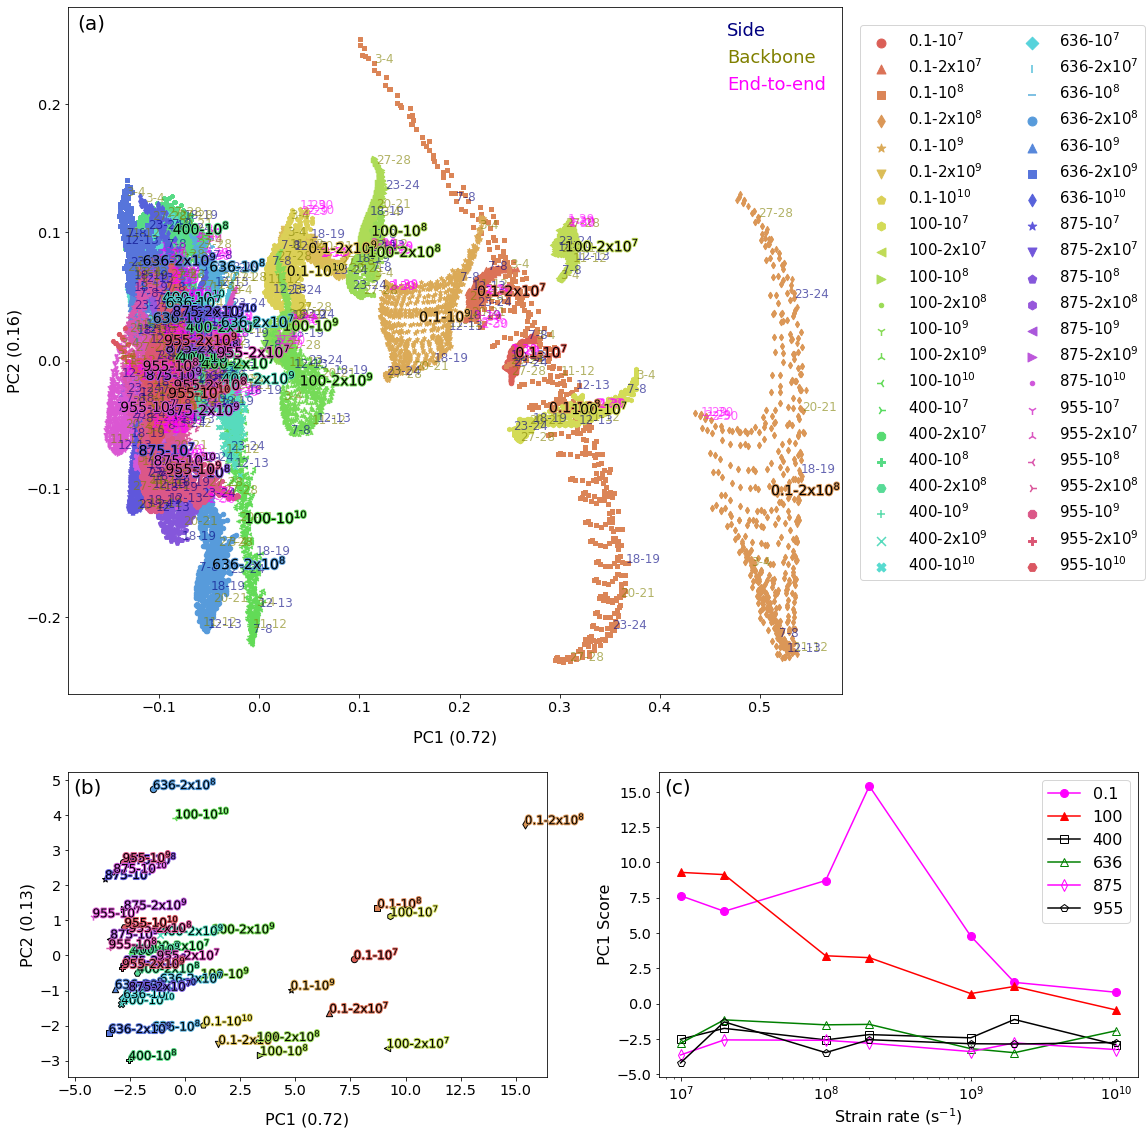

In [11]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from collections import defaultdict 

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
#inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
inclu_sr_list = ['sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,pair_wanted_all_indx.shape[0],6))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg).reshape(-1,6)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors))
    
    #markers = ["o","^","s","d","*","v","p","h","<",">"]
    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]
    

    for i, label in enumerate(num_classes):
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, 
                   marker=markers[label], s=20)#, facecolors='none'
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')

    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.6
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            #print("end end")
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[3], alpha=alpha)
    
    
    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        

        
 #-------------------------------------------------------------------------------------------

N_COL=2
N_ROW = 2
fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
ax = fig.axes

plot_indx= 0
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
compute_angles_between_x_y_z_for_pc(pca.components_)

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
fig.legend(ncol=2, fontsize=15, markerscale=2, bbox_to_anchor=(1.0005, 0.97), loc='upper right', frameon=True) #loc='upper center', bbox_to_anchor=(0.5,0.85)

markersize_ = 10
legend_elements = [Line2D([0], [0], linestyle="None", marker='None', color=pair_colors[0], label='Side', markerfacecolor=pair_colors[0]),
                   #Line2D([0], [0], linestyle="None",marker='o', color=pair_colors[1],label='End', markerfacecolor=pair_colors[1]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[2],label='Backbone', markerfacecolor=pair_colors[2]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[3],label='End-to-end', markerfacecolor=pair_colors[3])
                  ]

legend2 = ax[plot_indx].legend(ncol=1, fontsize=18, markerscale=2, bbox_to_anchor=(0.765, 0.85), loc='lower left', frameon=False, handles=legend_elements) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
       
for line, text in zip(legend2.get_lines(), legend2.get_texts()):
    text.set_color(line.get_color())
    
plot_indx=1

#ax.legend()
ax[plot_indx].axis('off')
ax[plot_indx].get_xaxis().set_ticks([])
ax[plot_indx].get_yaxis().set_ticks([])
ax[plot_indx].axis('tight')

#--------------------------- Second plot-----------------------------------------------
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
#inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
inclu_sr_list = ['sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
#-------------------------------------------------------------------------------------------

def compute_angles_between_2610_for_pc(components):
    angles = {}   
    all_pair_list = get_all_pairs()   
    vector_names = []
    for p in all_pair_list:
        for n in ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']:
            name_ = "{},{}".format(p,n)
            #print(name_)
            vector_names.append(name_)
    
    
    for pc, u in enumerate(components):
        
        #vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((len(vector_names), len(vector_names)))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Printing top 20 components')
    start=0
    stop=50
    print('Component', 'rad','deg')
    count=0
    for key, val in angles.items():
        if count<stop and count>start:
            print(key, '-',val)
        count =  count + 1
    
    return angles
#-------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            #print(value.shape)
            value = np.reshape(value, (-1,6*pair_wanted_all_indx.shape[0]))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=1,fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced


def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors)) #np.array(sns.color_palette("hls", total_colors))
    

    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]

       
    for i, label in enumerate(num_classes):
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1],  marker=markers[label],
                   color=palette[label], label=label_cluster, s=40, edgecolors='black')
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
               
#------------------------------------ Second plot-------------------------------------------------------
plot_indx= 2
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

print(arr_selected.shape)

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
print(pca.components_)

compute_angles_between_2610_for_pc(pca.components_)

plot_dict = {}
# break lables into pressure vs rates
for prss_ in  pressure_list_:
    results_ = []
    ylabels_ = []
    for i, key in enumerate(ylabel_text_reduced):
        pres_1 = key.split('P')[1].split('M')[0]
        sr_rate_1 = key.split('_')[1]
        if pres_1 == prss_:
            results_.append(tSNEResult[i,:])
            ylabels_.append(sr_rate_1)
    plot_dict[prss_] = [ylabels_, np.array(results_)]

print(tSNEResult.shape)
print(len(ylabel_text_reduced))

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
#fig.legend(ncol=2, fontsize=14, markerscale=2, bbox_to_anchor=(1.6, 1.05), loc='upper right', frameon=False) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
#fig.tight_layout()

#----------------------------------C figure--------------------------------
plot_indx = 3
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-.','--', ':', '-']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
#markerstyles = ["o", "s", "^", "p"]
#markerstyles = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerstyles = ['o', '^', 's', '^', 'd', 'p']
markercolors = ['magenta', 'red', 'black', 'green', 'magenta', 'black']
markerstyles_fills = ['full', 'full', 'none', 'none', 'none', 'none']

colors = ['blue', 'black', 'green', 'red']
markersize=8.0

#fig, ax1 = plt.subplots()
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#ax.plot(x, p_spring, label='SHO', color=colors[0], linestyle=linestyles[0], marker= markerstyles[0], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_dw, label='DW', color=colors[2], linestyle=linestyles[2], marker= markerstyles[2], markerfacecolor='none', markersize=markersize)
#ax.plot(xlj,p_lj, label='LJ',color=colors[1], linestyle=linestyles[1], marker= markerstyles[1], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_rugged, label='Rugged', color=colors[3], linestyle=linestyles[3], marker= markerstyles[3], markerfacecolor='none', markersize=markersize)


#-----------------------------------------------------------

x_data_label_all = set()
for i, (key, value) in enumerate(plot_dict.items()):
    #print(key, value[0][0].split("sr")[-1])
    x_data = []
    x_data_labels = []
    y_data_1 = []
    y_data_2 = []
    label = key
    for rate, pcs in zip(value[:][0], value[:][1]):
        #print(key, rate.split("sr")[-1], pcs.shape)
        x_data.append(float(rate.split("sr")[-1]))
        x_data_label_all.add(rate.split("sr")[-1])
        y_data_1.append(pcs[0])
        y_data_2.append(pcs[1])
    
    ax[plot_indx].plot(x_data, y_data_1, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    #ax[1].plot(x_data, y_data_2, label=label, marker= markerstyles[i], markersize=markersize)
    
        
rates_sorted_flt = []
rates_sorted = []
for l_rates in sorted(list(x_data_label_all), key=alphanum_key_scientific):
    rates_sorted_flt.append(float(l_rates))
    rates_sorted.append(l_rates)  
        
        
#plt.plot(x, f_rugged, label='F(x)')
#ax[1].set_title("PC1")
#ax[1].set_title("PC2")
#ax[0].set_xticks(rates_sorted)
ax[plot_indx].set_xticks(rates_sorted_flt)
#ax[0].set_xticklabels(rates_sorted)
#ax[1].set_xticks(rates_sorted_flt)
ax[plot_indx].set_xscale('log')
#ax[1].set_xscale('log')
#ax[1].set_xticks(x_data_all, x_data_label_all)
ax[plot_indx].legend(fontsize=16, markerscale=1)
#ax[1].legend()
ax[plot_indx].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx].set_ylabel('PC1 Score', fontsize=fontsize_axis_labels)
ax[plot_indx].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].yaxis.set_tick_params(labelsize='x-large')
#ax[1].set_xlabel('Rate')
#ax[1].set_ylabel('PC2 Score')
#ax.set_ylabel('Potential Energy, U(x)')
#ax.set_ylim(-1.05,4)

fontsize_axis_labels=20
fig.text(0.03,0.975,"(a)",horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(b)",horizontalalignment='center', verticalalignment='center', transform = ax[2].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(c)",horizontalalignment='center', verticalalignment='center', transform = ax[3].transAxes, fontsize=fontsize_axis_labels)

fig.tight_layout(h_pad=2.7)


-var ratio- [0.72117882 0.15716657]
Component rad deg
PC1-yy - (0.6802999318714199, 38.9783148992698)
PC2-xx - (0.9790201651651484, 56.093723522163785)
PC2-yy - (1.3461684339065356, 77.1297697765802)
PC2-yz - (1.4028990793027896, 80.38019632683883)
PC2-xy - (1.5417788264404988, 88.33741969767364)
PC1-zx - (1.5536844021551472, 89.01955893879644)
PC2-zx - (1.604452064030191, 91.92833169998366)
PC1-xy - (1.6330816984275862, 93.56868891995698)
PC1-yz - (1.7490735397816344, 100.21453188749494)
PC1-zz - (1.79112519899516, 102.62391448195238)
PC1-xx - (2.1637748553684832, 123.9751670291442)
PC2-zz - (2.466388961620329, 141.31367813849843)
(42, 5400)
-var ratio- [0.7189956  0.12504406]
[[-0.01836313  0.025494   -0.00713087 ... -0.00267268 -0.00353877
  -0.00203168]
 [-0.01497544 -0.00892216  0.0238976  ... -0.00500646 -0.00397685
   0.00041957]]
Printing top 20 components
Component rad deg
PC2-15-14,zz - (1.5399731696004404, 88.23396318148936)
PC2-14-15,zz - (1.5400028894754592, 88.23566600489

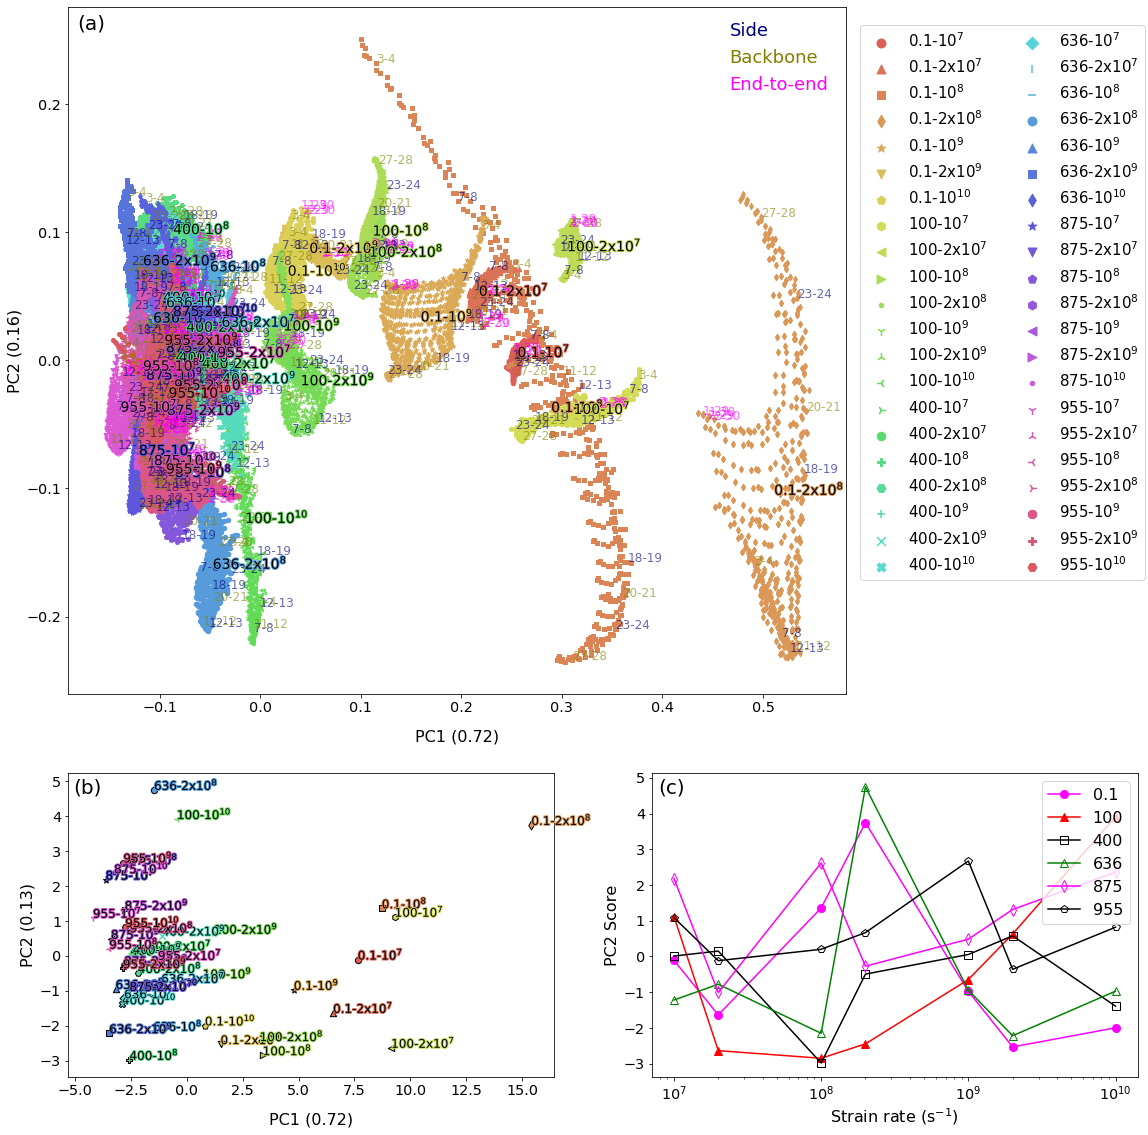

In [13]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from collections import defaultdict 

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
#inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
inclu_sr_list = ['sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,pair_wanted_all_indx.shape[0],6))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg).reshape(-1,6)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors))
    
    #markers = ["o","^","s","d","*","v","p","h","<",">"]
    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]
    

    for i, label in enumerate(num_classes):
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, 
                   marker=markers[label], s=20)#, facecolors='none'
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')

    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.6
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            #print("end end")
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[3], alpha=alpha)
    
    
    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        

        
 #-------------------------------------------------------------------------------------------

N_COL=2
N_ROW = 2
fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
ax = fig.axes

plot_indx= 0
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
compute_angles_between_x_y_z_for_pc(pca.components_)

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
fig.legend(ncol=2, fontsize=15, markerscale=2, bbox_to_anchor=(1.0005, 0.97), loc='upper right', frameon=True) #loc='upper center', bbox_to_anchor=(0.5,0.85)

markersize_ = 10
legend_elements = [Line2D([0], [0], linestyle="None", marker='None', color=pair_colors[0], label='Side', markerfacecolor=pair_colors[0]),
                   #Line2D([0], [0], linestyle="None",marker='o', color=pair_colors[1],label='End', markerfacecolor=pair_colors[1]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[2],label='Backbone', markerfacecolor=pair_colors[2]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[3],label='End-to-end', markerfacecolor=pair_colors[3])
                  ]

legend2 = ax[plot_indx].legend(ncol=1, fontsize=18, markerscale=2, bbox_to_anchor=(0.765, 0.85), loc='lower left', frameon=False, handles=legend_elements) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
       
for line, text in zip(legend2.get_lines(), legend2.get_texts()):
    text.set_color(line.get_color())
    
plot_indx=1

#ax.legend()
ax[plot_indx].axis('off')
ax[plot_indx].get_xaxis().set_ticks([])
ax[plot_indx].get_yaxis().set_ticks([])
ax[plot_indx].axis('tight')

#--------------------------- Second plot-----------------------------------------------
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
#inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
inclu_sr_list = ['sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
#-------------------------------------------------------------------------------------------

def compute_angles_between_2610_for_pc(components):
    angles = {}   
    all_pair_list = get_all_pairs()   
    vector_names = []
    for p in all_pair_list:
        for n in ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']:
            name_ = "{},{}".format(p,n)
            #print(name_)
            vector_names.append(name_)
    
    
    for pc, u in enumerate(components):
        
        #vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((len(vector_names), len(vector_names)))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Printing top 20 components')
    start=0
    stop=50
    print('Component', 'rad','deg')
    count=0
    for key, val in angles.items():
        if count<stop and count>start:
            print(key, '-',val)
        count =  count + 1
    
    return angles
#-------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            #print(value.shape)
            value = np.reshape(value, (-1,6*pair_wanted_all_indx.shape[0]))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=1,fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced


def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors)) #np.array(sns.color_palette("hls", total_colors))
    

    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]

       
    for i, label in enumerate(num_classes):
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1],  marker=markers[label],
                   color=palette[label], label=label_cluster, s=40, edgecolors='black')
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
               
#------------------------------------ Second plot-------------------------------------------------------
plot_indx= 2
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

print(arr_selected.shape)

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
print(pca.components_)

compute_angles_between_2610_for_pc(pca.components_)

plot_dict = {}
# break lables into pressure vs rates
for prss_ in  pressure_list_:
    results_ = []
    ylabels_ = []
    for i, key in enumerate(ylabel_text_reduced):
        pres_1 = key.split('P')[1].split('M')[0]
        sr_rate_1 = key.split('_')[1]
        if pres_1 == prss_:
            results_.append(tSNEResult[i,:])
            ylabels_.append(sr_rate_1)
    plot_dict[prss_] = [ylabels_, np.array(results_)]

print(tSNEResult.shape)
print(len(ylabel_text_reduced))

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
#fig.legend(ncol=2, fontsize=14, markerscale=2, bbox_to_anchor=(1.6, 1.05), loc='upper right', frameon=False) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
#fig.tight_layout()

#----------------------------------C figure--------------------------------
plot_indx = 3
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-.','--', ':', '-']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
#markerstyles = ["o", "s", "^", "p"]
#markerstyles = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerstyles = ['o', '^', 's', '^', 'd', 'p']
markercolors = ['magenta', 'red', 'black', 'green', 'magenta', 'black']
markerstyles_fills = ['full', 'full', 'none', 'none', 'none', 'none']

colors = ['blue', 'black', 'green', 'red']
markersize=8.0

#fig, ax1 = plt.subplots()
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#ax.plot(x, p_spring, label='SHO', color=colors[0], linestyle=linestyles[0], marker= markerstyles[0], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_dw, label='DW', color=colors[2], linestyle=linestyles[2], marker= markerstyles[2], markerfacecolor='none', markersize=markersize)
#ax.plot(xlj,p_lj, label='LJ',color=colors[1], linestyle=linestyles[1], marker= markerstyles[1], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_rugged, label='Rugged', color=colors[3], linestyle=linestyles[3], marker= markerstyles[3], markerfacecolor='none', markersize=markersize)


#-----------------------------------------------------------

x_data_label_all = set()
for i, (key, value) in enumerate(plot_dict.items()):
    #print(key, value[0][0].split("sr")[-1])
    x_data = []
    x_data_labels = []
    y_data_1 = []
    y_data_2 = []
    label = key
    for rate, pcs in zip(value[:][0], value[:][1]):
        #print(key, rate.split("sr")[-1], pcs.shape)
        x_data.append(float(rate.split("sr")[-1]))
        x_data_label_all.add(rate.split("sr")[-1])
        y_data_1.append(pcs[0])
        y_data_2.append(pcs[1])
    
    #ax[plot_indx].plot(x_data, y_data_1, label=label, marker= markerstyles[i], 
    #                   markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    ax[plot_indx].plot(x_data, y_data_2, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    
        
rates_sorted_flt = []
rates_sorted = []
for l_rates in sorted(list(x_data_label_all), key=alphanum_key_scientific):
    rates_sorted_flt.append(float(l_rates))
    rates_sorted.append(l_rates)  
        
        
#plt.plot(x, f_rugged, label='F(x)')
#ax[1].set_title("PC1")
#ax[1].set_title("PC2")
#ax[0].set_xticks(rates_sorted)
ax[plot_indx].set_xticks(rates_sorted_flt)
#ax[0].set_xticklabels(rates_sorted)
#ax[1].set_xticks(rates_sorted_flt)
ax[plot_indx].set_xscale('log')
#ax[1].set_xscale('log')
#ax[1].set_xticks(x_data_all, x_data_label_all)
ax[plot_indx].legend(fontsize=16, markerscale=1)
#ax[1].legend()
ax[plot_indx].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx].set_ylabel('PC2 Score', fontsize=fontsize_axis_labels)
ax[plot_indx].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].yaxis.set_tick_params(labelsize='x-large')
#ax[1].set_xlabel('Rate')
#ax[1].set_ylabel('PC2 Score')
#ax.set_ylabel('Potential Energy, U(x)')
#ax.set_ylim(-1.05,4)

fontsize_axis_labels=20
fig.text(0.03,0.975,"(a)",horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(b)",horizontalalignment='center', verticalalignment='center', transform = ax[2].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(c)",horizontalalignment='center', verticalalignment='center', transform = ax[3].transAxes, fontsize=fontsize_axis_labels)

fig.tight_layout(h_pad=2.7)


-var ratio- [0.72117882 0.15716657 0.05630966]
Component rad deg
PC1-yy - (0.6802999318714207, 38.97831489926985)
PC2-xx - (0.9790201651651489, 56.09372352216381)
PC2-yy - (1.3461684339065352, 77.12976977658018)
PC2-yz - (1.4028990793027898, 80.38019632683884)
PC3-xx - (1.4367963238816344, 82.32236537832934)
PC2-xy - (1.541778826440499, 88.33741969767365)
PC1-zx - (1.5536844021551472, 89.01955893879644)
PC2-zx - (1.604452064030191, 91.92833169998366)
PC3-zz - (1.6240371040833232, 93.05047183662282)
PC1-xy - (1.6330816984275862, 93.56868891995698)
PC3-yy - (1.6512668637290222, 94.61062214147701)
PC1-yz - (1.7490735397816346, 100.21453188749496)
PC1-zz - (1.7911251989951598, 102.62391448195237)
PC3-xy - (1.8614031620794025, 106.65054515945569)
PC1-xx - (2.163774855368484, 123.97516702914426)
PC3-zx - (2.296230264074423, 131.56430292167494)
PC3-yz - (2.3066904652962714, 132.16362830454443)
PC2-zz - (2.466388961620329, 141.31367813849843)


ValueError: too many values to unpack (expected 2)

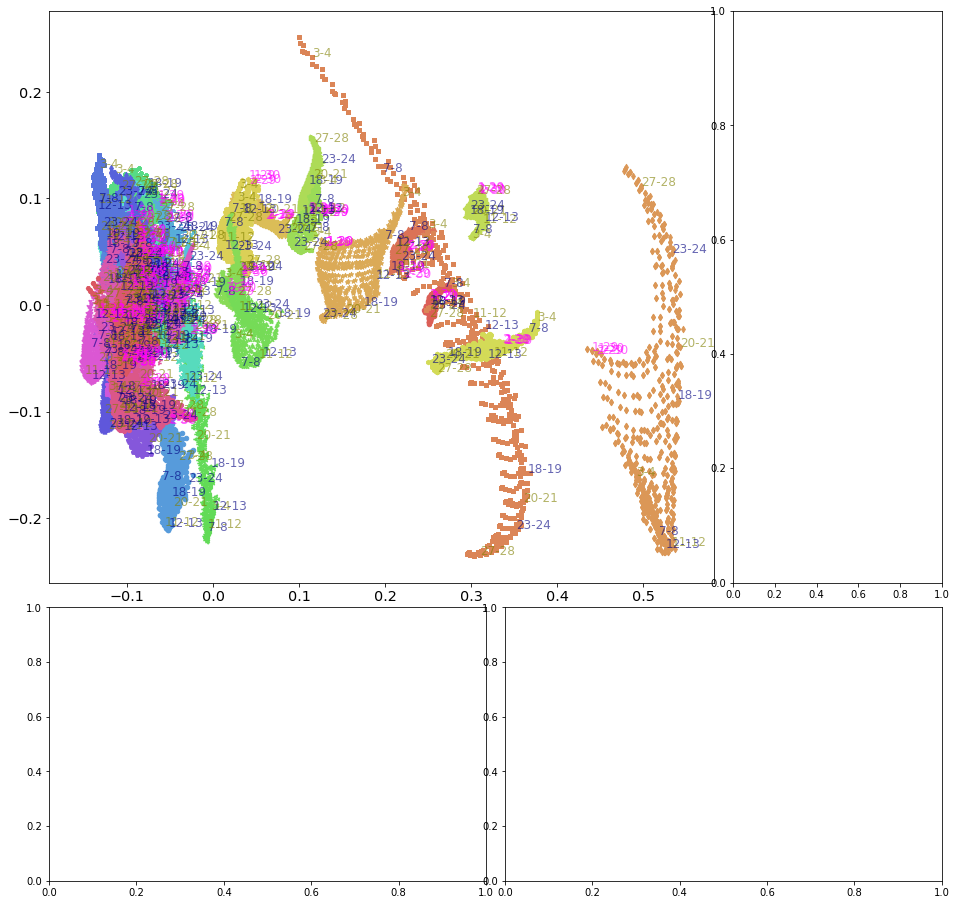

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from collections import defaultdict 

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
#inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
inclu_sr_list = ['sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,pair_wanted_all_indx.shape[0],6))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg).reshape(-1,6)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors))
    
    #markers = ["o","^","s","d","*","v","p","h","<",">"]
    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]
    

    for i, label in enumerate(num_classes):
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, 
                   marker=markers[label], s=20)#, facecolors='none'
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')

    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.6
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            #print("end end")
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[3], alpha=alpha)
    
    
    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        

        
 #-------------------------------------------------------------------------------------------

N_COL=2
N_ROW = 2
fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
ax = fig.axes

plot_indx= 0
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

pca = PCA(n_components=3, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
compute_angles_between_x_y_z_for_pc(pca.components_)

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
fig.legend(ncol=2, fontsize=15, markerscale=2, bbox_to_anchor=(1.0005, 0.97), loc='upper right', frameon=True) #loc='upper center', bbox_to_anchor=(0.5,0.85)

markersize_ = 10
legend_elements = [Line2D([0], [0], linestyle="None", marker='None', color=pair_colors[0], label='Side', markerfacecolor=pair_colors[0]),
                   #Line2D([0], [0], linestyle="None",marker='o', color=pair_colors[1],label='End', markerfacecolor=pair_colors[1]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[2],label='Backbone', markerfacecolor=pair_colors[2]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[3],label='End-to-end', markerfacecolor=pair_colors[3])
                  ]

legend2 = ax[plot_indx].legend(ncol=1, fontsize=18, markerscale=2, bbox_to_anchor=(0.765, 0.85), loc='lower left', frameon=False, handles=legend_elements) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
       
for line, text in zip(legend2.get_lines(), legend2.get_texts()):
    text.set_color(line.get_color())
    
plot_indx=1

#ax.legend()
ax[plot_indx].axis('off')
ax[plot_indx].get_xaxis().set_ticks([])
ax[plot_indx].get_yaxis().set_ticks([])
ax[plot_indx].axis('tight')

#--------------------------- Second plot-----------------------------------------------
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
#inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
inclu_sr_list = ['sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
#-------------------------------------------------------------------------------------------

def compute_angles_between_2610_for_pc(components):
    angles = {}   
    all_pair_list = get_all_pairs()   
    vector_names = []
    for p in all_pair_list:
        for n in ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']:
            name_ = "{},{}".format(p,n)
            #print(name_)
            vector_names.append(name_)
    
    
    for pc, u in enumerate(components):
        
        #vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((len(vector_names), len(vector_names)))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Printing top 20 components')
    start=0
    stop=50
    print('Component', 'rad','deg')
    count=0
    for key, val in angles.items():
        if count<stop and count>start:
            print(key, '-',val)
        count =  count + 1
    
    return angles
#-------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            #print(value.shape)
            value = np.reshape(value, (-1,6*pair_wanted_all_indx.shape[0]))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=1,fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced


def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors)) #np.array(sns.color_palette("hls", total_colors))
    

    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]

       
    for i, label in enumerate(num_classes):
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1],  marker=markers[label],
                   color=palette[label], label=label_cluster, s=40, edgecolors='black')
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
               
#------------------------------------ Second plot-------------------------------------------------------
plot_indx= 2
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

print(arr_selected.shape)

pca = PCA(n_components=3, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
print(pca.components_)

### Viscosity data
*  the viscosity (eta) is shear stress divided by shear rate. Only Newtonian liquids can be described by this simple relation.


In [4]:
"""


pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

base_path_jhu = 'benchmark_jhu_data'

for p in pressure_list_:
    for ra in inclu_sr_list:
        print("{}-{}".format(p,ra))
        

"""


viscosity_data = {

"0.1":{
"0.1-sr1e7":[1e7,3.25525],
"0.1-sr2e7":[2e7,6.13928],
"0.1-sr1e8":[1e8,26.4724],
"0.1-sr2e8":[2e8,44.6349],
"0.1-sr1e9":[1e9,132.02],
"0.1-sr2e9":[2e9, 189.696],
"0.1-sr1e10":[1e10,338.885],
},
"100":{    
"100-sr1e7":[1e7,18.5553],
"100-sr2e7":[2e7,43.1798],
"100-sr1e8":[1e8,115.225],
"100-sr2e8":[2e8,172.685],
"100-sr1e9":[1e9,308.709],
"100-sr2e9":[2e9,376.502],
"100-sr1e10":[1e10,545.472],
},
"400":{
"400-sr1e7":[1e7,315.272],
"400-sr2e7":[2e7,386.729],
"400-sr1e8":[1e8,545.167],
"400-sr2e8":[2e8,617.251],
"400-sr1e9":[1e9,754.01],
"400-sr2e9":[2e9,808.073],
"400-sr1e10":[1e10,996.767],
},
"636":{
"636-sr1e7":[1e7,623.825],
"636-sr2e7":[2e7,667.34],
"636-sr1e8":[1e8,839.477],
"636-sr2e8":[2e8,887.526],
"636-sr1e9":[1e9,1036.9],
"636-sr2e9":[2e9,1102.11],
"636-sr1e10":[1e10,1305.13],
}, 
"875":{    
"875-sr1e7":[1e7,875.266],
"875-sr2e7":[2e7,930.613],
"875-sr1e8":[1e8,1083],
"875-sr2e8":[2e8,1132.06],
"875-sr1e9":[1e9,1277.39],
"875-sr2e9":[2e9,1354.79],
"875-sr1e10":[1e10,1582.99],
}, 
"955":{    
"955-sr1e7":[1e7,942.253],
"955-sr2e7":[2e7,1011.38],
"955-sr1e8":[1e8,1150.02],
"955-sr2e8":[2e8,1214.97],
"955-sr1e9":[1e9,1362.21],
"955-sr2e9":[2e9,1425.83],
"955-sr1e10":[1e10,1643.31] 
},
}


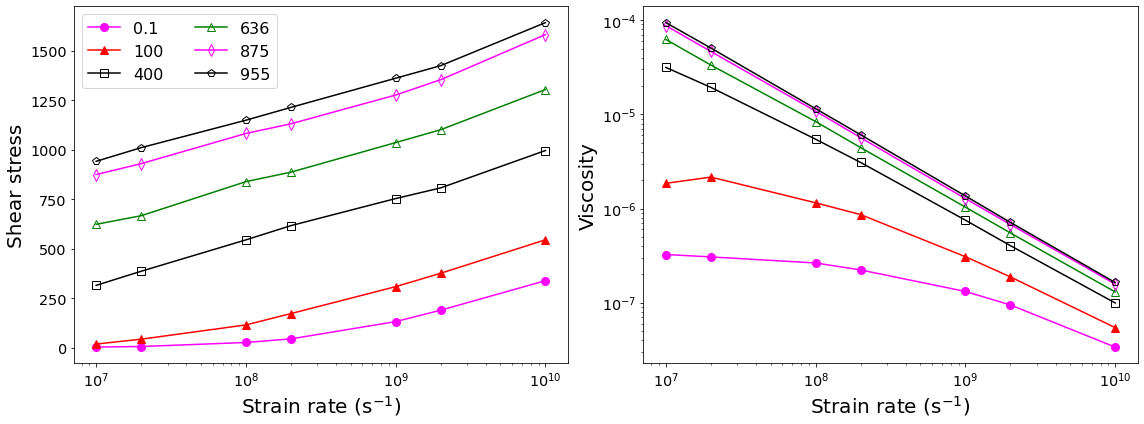

In [5]:
N_COL=2
N_ROW = 1

#fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
fig, ax = plt.subplots(nrows=N_ROW, ncols=N_COL, figsize=(8*N_COL, 6*N_ROW))
#ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
#ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
#ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
#ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
#ax = fig.axes

plot_indx = 0
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-.','--', ':', '-']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
#markerstyles = ["o", "s", "^", "p"]
#markerstyles = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerstyles = ['o', '^', 's', '^', 'd', 'p']
markercolors = ['magenta', 'red', 'black', 'green', 'magenta', 'black']
markerstyles_fills = ['full', 'full', 'none', 'none', 'none', 'none']

colors = ['blue', 'black', 'green', 'red']
markersize=8.0

#fig, ax1 = plt.subplots()
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#ax.plot(x, p_spring, label='SHO', color=colors[0], linestyle=linestyles[0], marker= markerstyles[0], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_dw, label='DW', color=colors[2], linestyle=linestyles[2], marker= markerstyles[2], markerfacecolor='none', markersize=markersize)
#ax.plot(xlj,p_lj, label='LJ',color=colors[1], linestyle=linestyles[1], marker= markerstyles[1], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_rugged, label='Rugged', color=colors[3], linestyle=linestyles[3], marker= markerstyles[3], markerfacecolor='none', markersize=markersize)


#-----------------------------------------------------------

x_data_label_all_vis = set()
for i, (key, value) in enumerate(viscosity_data.items()):
    #print(key, value)
    x_data_vis = []
    x_data_labels_vis = []
    y_data_1_vis = []
    y_data_2_vis = []
    label = key
    
    for rate_label, data_ in value.items():
        #print(rate_label, rate_label.split("sr")[-1], data_)
        x_data_vis.append(float(rate_label.split("sr")[-1]))
        x_data_label_all_vis.add(rate_label.split("sr")[-1])
        y_data_1_vis.append(data_[1])
        y_data_2_vis.append(data_[1]/float(rate_label.split("sr")[-1]))
    
    
    ax[plot_indx].plot(x_data_vis, y_data_1_vis, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    
    ax[plot_indx+1].plot(x_data_vis, y_data_2_vis, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    


        
rates_sorted_flt_vis = []
rates_sorted_vis = []
for l_rates in sorted(list(x_data_label_all_vis), key=alphanum_key_scientific):
    rates_sorted_flt_vis.append(float(l_rates))
    rates_sorted_vis.append(l_rates)  
        
        
#plt.plot(x, f_rugged, label='F(x)')
#ax[1].set_title("PC1")
#ax[1].set_title("PC2")
#ax[0].set_xticks(rates_sorted)
ax[plot_indx].set_xticks(rates_sorted_flt_vis)
#ax[0].set_xticklabels(rates_sorted)
#ax[1].set_xticks(rates_sorted_flt)
ax[plot_indx].set_xscale('log')
#ax[1].set_xscale('log')
#ax[1].set_xticks(x_data_all, x_data_label_all)
ax[plot_indx].legend(fontsize=16, markerscale=1, ncol=2)
#ax[1].legend()
ax[plot_indx].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx].set_ylabel('Shear stress', fontsize=fontsize_axis_labels)
ax[plot_indx].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].yaxis.set_tick_params(labelsize='x-large')
#ax[1].set_xlabel('Rate')
#ax[1].set_ylabel('PC2 Score')
#ax.set_ylabel('Potential Energy, U(x)')
#ax.set_ylim(-1.05,4)

ax[plot_indx+1].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx+1].set_ylabel('Viscosity', fontsize=fontsize_axis_labels)
ax[plot_indx+1].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx+1].yaxis.set_tick_params(labelsize='x-large')
ax[plot_indx+1].set_yscale('log')
ax[plot_indx+1].set_xscale('log')


fontsize_axis_labels=20
#fig.text(0.03,0.975,"(a)",horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes, fontsize=fontsize_axis_labels)
#fig.text(0.04,0.95,"(b)",horizontalalignment='center', verticalalignment='center', transform = ax[2].transAxes, fontsize=fontsize_axis_labels)
#fig.text(0.04,0.95,"(c)",horizontalalignment='center', verticalalignment='center', transform = ax[3].transAxes, fontsize=fontsize_axis_labels)

fig.tight_layout(h_pad=2.7)

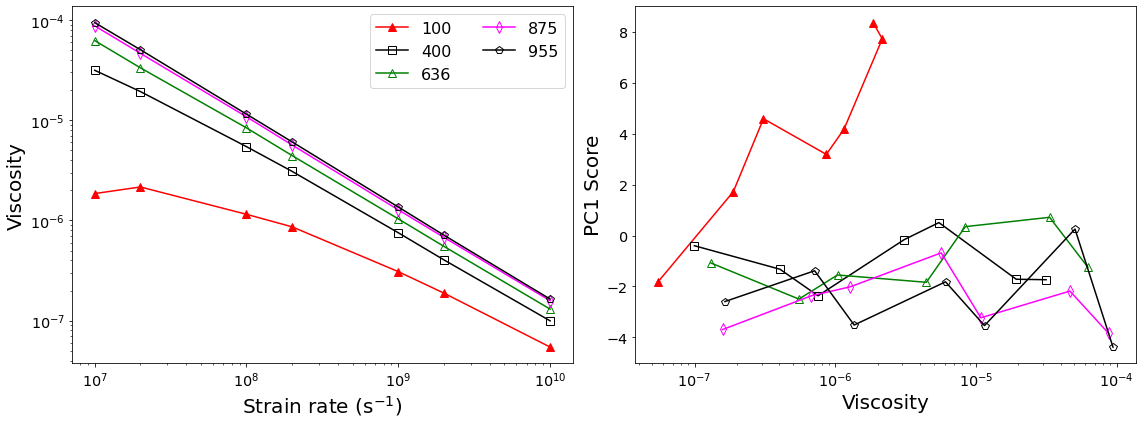

In [8]:
N_COL=2
N_ROW = 1

#fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
fig, ax = plt.subplots(nrows=N_ROW, ncols=N_COL, figsize=(8*N_COL, 6*N_ROW))
#ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
#ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
#ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
#ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
#ax = fig.axes

plot_indx = 0
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-.','--', ':', '-']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
#markerstyles = ["o", "s", "^", "p"]
#markerstyles = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerstyles = ['o', '^', 's', '^', 'd', 'p']
markercolors = ['magenta', 'red', 'black', 'green', 'magenta', 'black']
markerstyles_fills = ['full', 'full', 'none', 'none', 'none', 'none']

colors = ['blue', 'black', 'green', 'red']
markersize=8.0

#fig, ax1 = plt.subplots()
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#ax.plot(x, p_spring, label='SHO', color=colors[0], linestyle=linestyles[0], marker= markerstyles[0], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_dw, label='DW', color=colors[2], linestyle=linestyles[2], marker= markerstyles[2], markerfacecolor='none', markersize=markersize)
#ax.plot(xlj,p_lj, label='LJ',color=colors[1], linestyle=linestyles[1], marker= markerstyles[1], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_rugged, label='Rugged', color=colors[3], linestyle=linestyles[3], marker= markerstyles[3], markerfacecolor='none', markersize=markersize)


#-----------------------------------------------------------

x_data_label_all_vis = set()
for i, (key, value) in enumerate(viscosity_data.items()):
    #print(key, value)
    
    if '0.1' in key:
        continue
        
    x_data_vis = []
    x_data_labels_vis = []
    y_data_1_vis = []
    y_data_2_vis = []
    relevent_pc_data = []
    label = key
    
    for rate_label, data_ in value.items():
        #print(rate_label, rate_label.split("sr")[-1], data_)
        x_data_vis.append(float(rate_label.split("sr")[-1]))
        x_data_label_all_vis.add(rate_label.split("sr")[-1])
        y_data_1_vis.append(data_[1])
        y_data_2_vis.append(data_[1]/float(rate_label.split("sr")[-1]))
        
        pc1_re = plot_dict[key][1][plot_dict[key][0].index(rate_label.split("-")[-1])][0]
        #print(pc1_re)
        relevent_pc_data.append(pc1_re)
    
    ax[plot_indx].plot(x_data_vis, y_data_2_vis, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    
    #ax[plot_indx+1].plot(x_data_vis, relevent_pc_data, label=label, marker= markerstyles[i], 
    #                   markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    ax[plot_indx+1].plot(y_data_2_vis, relevent_pc_data, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])

        
rates_sorted_flt_vis = []
rates_sorted_vis = []
for l_rates in sorted(list(x_data_label_all_vis), key=alphanum_key_scientific):
    rates_sorted_flt_vis.append(float(l_rates))
    rates_sorted_vis.append(l_rates)  
        

ax[plot_indx].set_xticks(rates_sorted_flt_vis)
ax[plot_indx].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx].set_ylabel('Viscosity', fontsize=fontsize_axis_labels)
ax[plot_indx].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].yaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].set_yscale('log')
ax[plot_indx].set_xscale('log')
ax[plot_indx].legend(fontsize=16, markerscale=1, ncol=2)


#ax[plot_indx+1].set_xticks(rates_sorted_flt_vis)
ax[plot_indx+1].set_xlabel('Viscosity', fontsize=fontsize_axis_labels)
ax[plot_indx+1].set_ylabel('PC1 Score', fontsize=fontsize_axis_labels)
ax[plot_indx+1].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx+1].yaxis.set_tick_params(labelsize='x-large')
#ax[plot_indx+1].set_yscale('log')
ax[plot_indx+1].set_xscale('log')



fontsize_axis_labels=20
#fig.text(0.03,0.975,"(a)",horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes, fontsize=fontsize_axis_labels)
#fig.text(0.04,0.95,"(b)",horizontalalignment='center', verticalalignment='center', transform = ax[2].transAxes, fontsize=fontsize_axis_labels)
#fig.text(0.04,0.95,"(c)",horizontalalignment='center', verticalalignment='center', transform = ax[3].transAxes, fontsize=fontsize_axis_labels)

fig.tight_layout(h_pad=2.7)

### Correlation plot

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from collections import defaultdict 

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
#pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#pressure_list_ = ['0.1', '100']
#pressure_list_ = ['875', '955']
#pressure_list_ = ['0.1', '100', '875', '955']
pressure_list_ = ['100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,pair_wanted_all_indx.shape[0],6))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg).reshape(-1,6)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors))
    
    #markers = ["o","^","s","d","*","v","p","h","<",">"]
    markers = ["o","^","s","d","*","v","p","h","<",">",
               ".","1","2","3","4","8","P","H","+","x",
               "X","D","|","_","o","^","s","d","*","v",
               "p","h","<",">",".","1","2","3","4","8",
               "P","H","+","x","X","D","|","_","o","^",
               "s","d","*","v","p","h","<",">",".","1",
               "2","3","4","8","P","H","+","x","X","D","|","_"]
    

    for i, label in enumerate(num_classes):
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, 
                   marker=markers[label], s=20)#, facecolors='none'
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')

    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.6
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            #print("end end")
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[3], alpha=alpha)
    
    
    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        

        
 #-------------------------------------------------------------------------------------------

plot_indx= 0
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
compute_angles_between_x_y_z_for_pc(pca.components_)

-var ratio- [0.45608269 0.31020087]
Component rad deg
PC1-yy - (0.6303495042334516, 36.116366210740594)
PC2-zz - (0.907926735970953, 52.02037007822423)
PC2-yz - (1.288266215318818, 73.81221702706003)
PC2-yy - (1.4622171674932916, 83.7788724289394)
PC2-zx - (1.485722933290113, 85.12565360332023)
PC2-xy - (1.5423177380147004, 88.36829705640613)
PC1-yz - (1.5535676243132197, 89.01286806131336)
PC1-zx - (1.572621559317141, 90.10457812015463)
PC1-xy - (1.5905757215845087, 91.13327584276783)
PC1-xx - (1.8784296047955817, 107.62608846721402)
PC1-zz - (2.1001987703040905, 120.3325256769898)
PC2-xx - (2.3800135311981956, 136.3647305216843)


{'PC1-yy': (0.6303495042334516, 36.116366210740594),
 'PC2-zz': (0.907926735970953, 52.02037007822423),
 'PC2-yz': (1.288266215318818, 73.81221702706003),
 'PC2-yy': (1.4622171674932916, 83.7788724289394),
 'PC2-zx': (1.485722933290113, 85.12565360332023),
 'PC2-xy': (1.5423177380147004, 88.36829705640613),
 'PC1-yz': (1.5535676243132197, 89.01286806131336),
 'PC1-zx': (1.572621559317141, 90.10457812015463),
 'PC1-xy': (1.5905757215845087, 91.13327584276783),
 'PC1-xx': (1.8784296047955817, 107.62608846721402),
 'PC1-zz': (2.1001987703040905, 120.3325256769898),
 'PC2-xx': (2.3800135311981956, 136.3647305216843)}

(6, 37800)
(6, 6)
[[0.0059833  0.00543915 0.00531549 0.00520474 0.00413771 0.00538104]
 [0.00543915 0.01477454 0.01150129 0.01164413 0.01163364 0.01466018]
 [0.00531549 0.01150129 0.01331547 0.01048934 0.01150669 0.0129568 ]
 [0.00520474 0.01164413 0.01048934 0.01423981 0.01023054 0.01303313]
 [0.00413771 0.01163364 0.01150669 0.01023054 0.0180173  0.01457561]
 [0.00538104 0.01466018 0.0129568  0.01303313 0.01457561 0.01869852]]


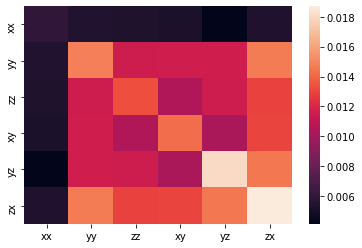

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

arr_controlled_for_cov = arr_controlled.reshape(6,-1)
cov_labels = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']

print(arr_controlled_for_cov.shape)

data_cov = np.cov(arr_controlled_for_cov)
print(data_cov.shape)
print(data_cov)

sns.heatmap(data_cov, annot=False, fmt='g', xticklabels=cov_labels, yticklabels=cov_labels)
plt.show()


(37800, 6)
42
37800
(37800, 4)
<class 'pandas.core.frame.DataFrame'>
(37800, 6)
             xx        yy        zz        xy        yz        zx
0     -0.058976  0.131154 -0.072178 -0.082103 -0.169434  0.066468
1     -0.058090  0.131535 -0.073445 -0.082499 -0.170543  0.067336
2     -0.059334  0.134886 -0.075552 -0.083836 -0.170168  0.064985
3     -0.056887  0.128059 -0.071172 -0.082312 -0.169420  0.068348
4     -0.052807  0.121797 -0.068989 -0.083450 -0.166154  0.068828
...         ...       ...       ...       ...       ...       ...
37795  0.172287 -0.253808  0.081521  0.013521 -0.003723 -0.048821
37796  0.174330 -0.254174  0.079845  0.018052 -0.008278 -0.055010
37797  0.176712 -0.254540  0.077828  0.021289 -0.012641 -0.062723
37798  0.180551 -0.257370  0.076820  0.021427 -0.016941 -0.061386
37799  0.175750 -0.251740  0.075990  0.023571 -0.015729 -0.067159

[37800 rows x 6 columns]


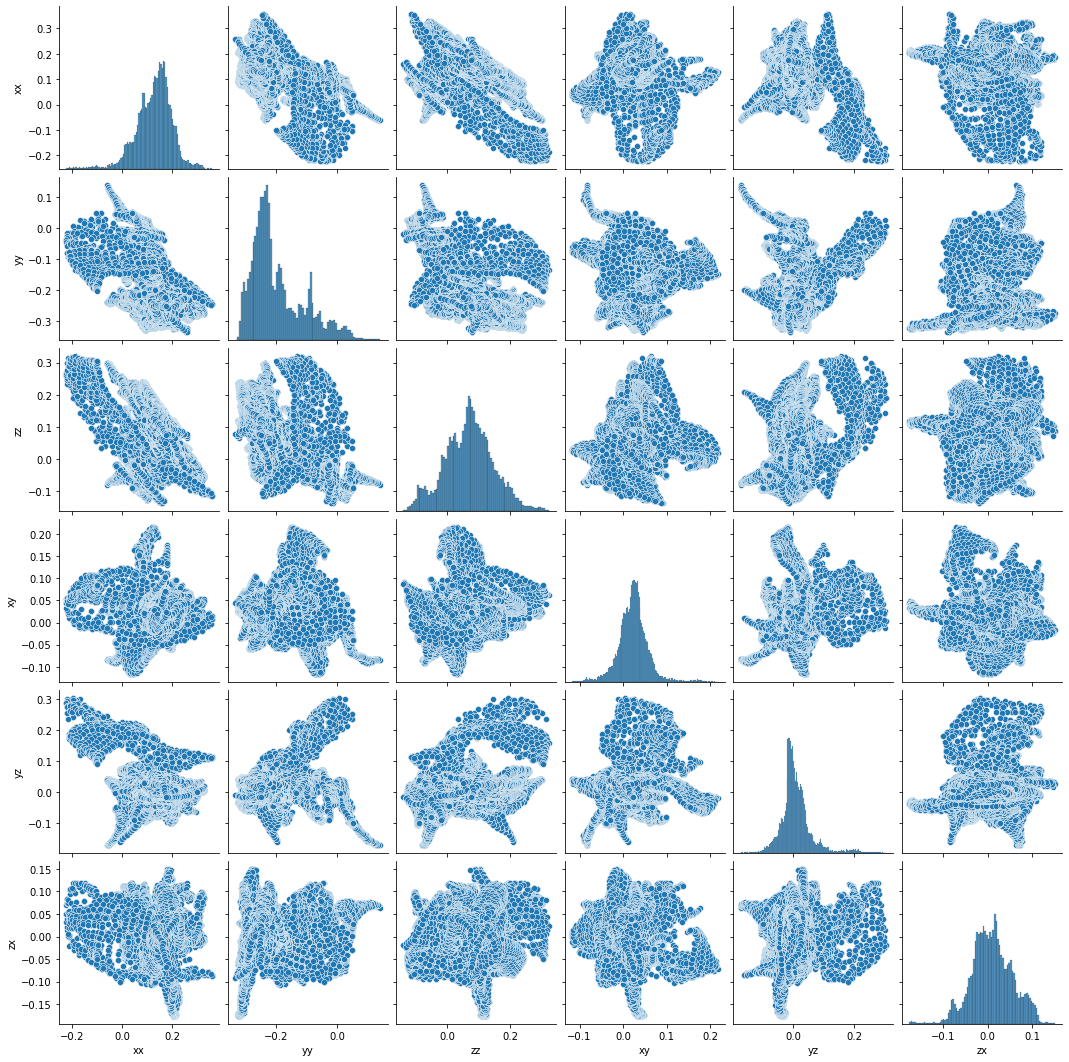

In [11]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(arr_controlled.shape)
print(len(ylabel_text_reduced))
print(len(ylabel_reduced))
print(pairlabel_reduced.shape)

df = pd.DataFrame(arr_controlled,columns=( 'xx', 'yy', 'zz', 'xy', 'yz', 'zx'))

df['xx'] = df['xx'].astype(float)
df['yy'] = df['yy'].astype(float)
df['zz'] = df['zz'].astype(float)
df['xy'] = df['xy'].astype(float)
df['yz'] = df['yz'].astype(float)
df['zx'] = df['zx'].astype(float)

print(type(df))
print(df.shape)
print(df)

sns.pairplot(df)
plt.show()


(37800, 6)
42
37800
(37800, 4)
37800
37800
<class 'pandas.core.frame.DataFrame'>
(37800, 8)
      pressure_rate_list pair_list        xx        yy        zz        xy  \
0          P100MPa_sr1e7       1-1 -0.058976  0.131154 -0.072178 -0.082103   
1          P100MPa_sr1e7       1-2 -0.058090  0.131535 -0.073445 -0.082499   
2          P100MPa_sr1e7       1-3 -0.059334  0.134886 -0.075552 -0.083836   
3          P100MPa_sr1e7       1-4 -0.056887  0.128059 -0.071172 -0.082312   
4          P100MPa_sr1e7       1-5 -0.052807  0.121797 -0.068989 -0.083450   
...                  ...       ...       ...       ...       ...       ...   
37795     P955MPa_sr1e10     30-26  0.172287 -0.253808  0.081521  0.013521   
37796     P955MPa_sr1e10     30-27  0.174330 -0.254174  0.079845  0.018052   
37797     P955MPa_sr1e10     30-28  0.176712 -0.254540  0.077828  0.021289   
37798     P955MPa_sr1e10     30-29  0.180551 -0.257370  0.076820  0.021427   
37799     P955MPa_sr1e10     30-30  0.175750 -0.25

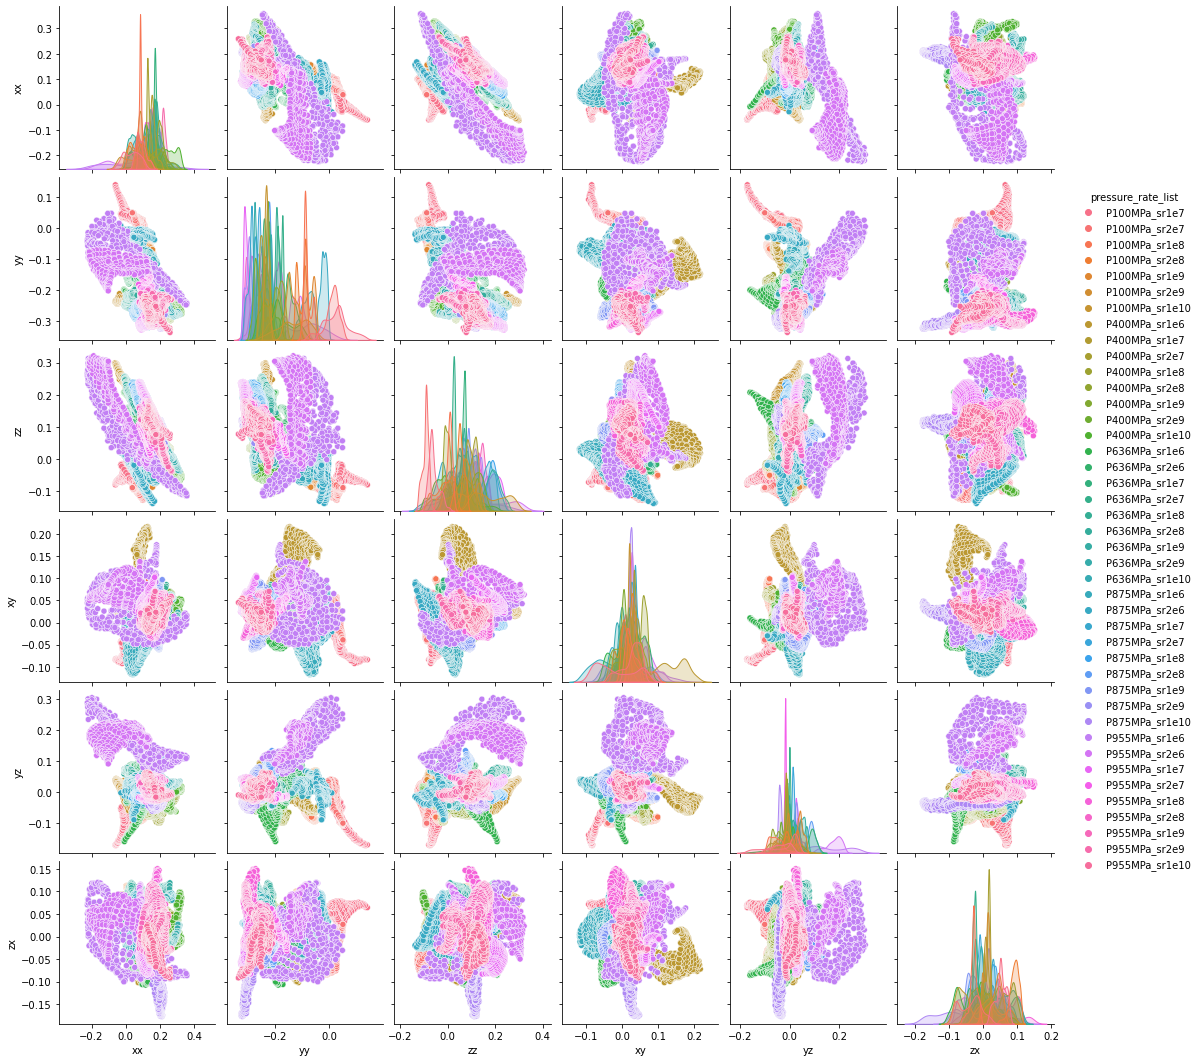

In [12]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(arr_controlled.shape)
print(len(ylabel_text_reduced))
print(len(ylabel_reduced))
print(pairlabel_reduced.shape)

pressure_rate_list = []
pressure_rate_pair_list = []

for label in ylabel_text_reduced:
    for pair in get_all_pairs():
        pres = label.split('_')[0]
        #pressure_rate_list.append(pres)
        pressure_rate_list.append(label)
        pressure_rate_pair_ = label+','+pair
        #pressure_rate_pair_list.append(pressure_rate_pair_)
        pressure_rate_pair_list.append(pair)
        #print(label.split('_')[0])
        
print(len(pressure_rate_list))        
print(len(pressure_rate_pair_list))   

all_data_with_index = np.column_stack((pressure_rate_list, pressure_rate_pair_list, arr_controlled))


df = pd.DataFrame(all_data_with_index,columns=('pressure_rate_list', 'pair_list', 'xx', 'yy', 'zz', 'xy', 'yz', 'zx'))

#df = pd.DataFrame(arr_controlled,columns=( 'xx', 'yy', 'zz', 'xy', 'yz', 'zx'))

df['xx'] = df['xx'].astype(float)
df['yy'] = df['yy'].astype(float)
df['zz'] = df['zz'].astype(float)
df['xy'] = df['xy'].astype(float)
df['yz'] = df['yz'].astype(float)
df['zx'] = df['zx'].astype(float)

print(type(df))
print(df.shape)
print(df)

#sns.pairplot(df, vars=df.columns[2:], hue="pressure_rate_list")
g = sns.pairplot(df, vars=df.columns[2:], hue="pressure_rate_list")

plt.show()

In [61]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(arr_controlled.shape)
print(len(ylabel_text_reduced))
print(len(ylabel_reduced))
print(pairlabel_reduced.shape)

pressure_rate_list = []
pressure_rate_pair_list = []

for label in ylabel_text_reduced:
    for pair in get_all_pairs():
        pres = label.split('_')[0]
        #pressure_rate_list.append(pres)
        pressure_rate_list.append(label)
        pressure_rate_pair_ = label+','+pair
        #pressure_rate_pair_list.append(pressure_rate_pair_)
        pressure_rate_pair_list.append(pair)
        #print(label.split('_')[0])
        
print(len(pressure_rate_list))        
print(len(pressure_rate_pair_list))   

all_data_with_index = np.column_stack((pressure_rate_list, pressure_rate_pair_list, arr_controlled))


df = pd.DataFrame(all_data_with_index,columns=('pressure_rate_list', 'pair_list', 'xx', 'yy', 'zz', 'xy', 'yz', 'zx'))

#df = pd.DataFrame(arr_controlled,columns=( 'xx', 'yy', 'zz', 'xy', 'yz', 'zx'))

df['xx'] = df['xx'].astype(float)
df['yy'] = df['yy'].astype(float)
df['zz'] = df['zz'].astype(float)
df['xy'] = df['xy'].astype(float)
df['yz'] = df['yz'].astype(float)
df['zx'] = df['zx'].astype(float)

print(type(df))
print(df.shape)
print(df)

#sns.pairplot(df, vars=df.columns[2:], hue="pressure_rate_list")
#g = sns.pairplot(df.sample(5000), vars=df.columns[2:], hue="pair_list", diag_kind='kde')
g = sns.pairplot(df, vars=df.columns[2:], hue="pair_list", diag_kind='kde')

handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, ncol=6, bbox_to_anchor=(1.4, 1.05))

plt.show()

(13920, 6)
32
13920
(13920, 4)
13920
13920
<class 'pandas.core.frame.DataFrame'>
(13920, 8)
      pressure_rate_list pair_list        xx        yy        zz        xy  \
0          P0.1MPa_sr1e7       1-2 -0.001438 -0.000403  0.001842 -0.000945   
1          P0.1MPa_sr1e7       1-3 -0.001007  0.000087  0.000921 -0.000733   
2          P0.1MPa_sr1e7       1-4 -0.000737 -0.001398  0.002135  0.001271   
3          P0.1MPa_sr1e7       1-5 -0.001167 -0.001782  0.002949  0.004476   
4          P0.1MPa_sr1e7       1-6 -0.001314 -0.001688  0.003002  0.004455   
...                  ...       ...       ...       ...       ...       ...   
13915     P955MPa_sr1e10     27-29  0.127919 -0.094706 -0.033213  0.094202   
13916     P955MPa_sr1e10     27-30  0.145332 -0.095719 -0.049613  0.093070   
13917     P955MPa_sr1e10     28-29  0.011062 -0.018768  0.007705  0.044671   
13918     P955MPa_sr1e10     28-30  0.026672 -0.024827 -0.001845  0.049826   
13919     P955MPa_sr1e10     29-30 -0.039154  0.00

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000189B4253F70> (for post_execute):


KeyboardInterrupt: 

## Plotting the orientation tensor components with rates

['1-30']
[28]
(8, 6)
['1-30']
[28]
(8, 6)
['1-30']
[28]
(9, 6)
['1-30']
[28]
(10, 6)
['1-30']
[28]
(10, 6)
['1-30']
[28]
(10, 6)


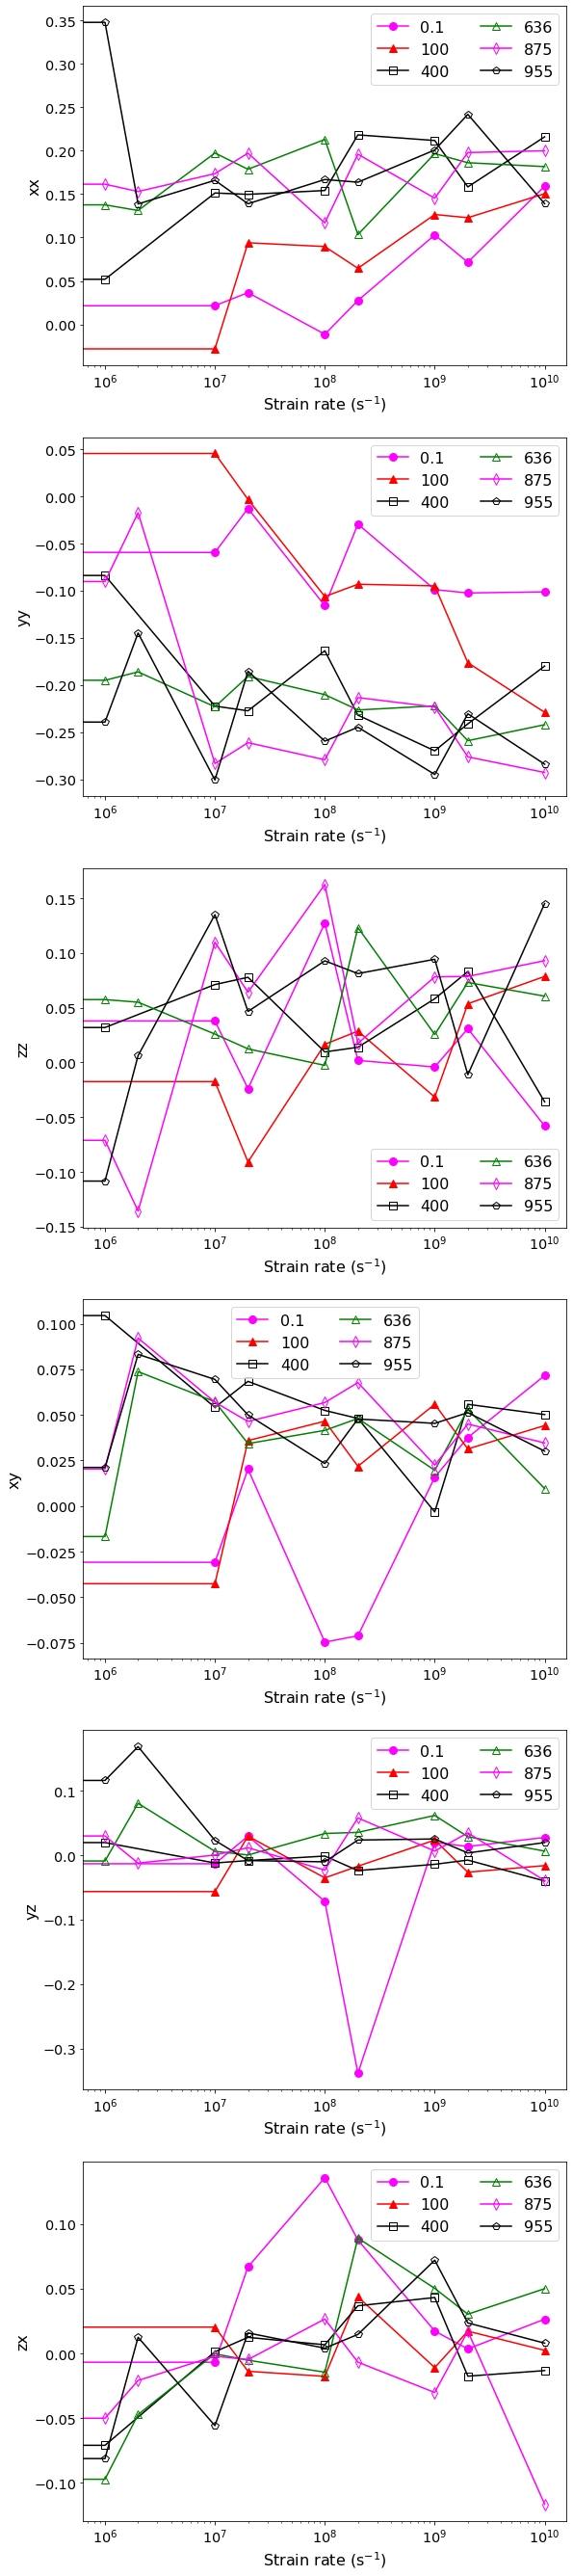

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles

def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = {}
    color_list = {}
    color_list_formatted = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        count=0
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            count += 1
            if key.split("_sr")[0] in name_list:
                name_list[key.split("_sr")[0]].append(key.split("_sr")[1])
            else:
                name_list[key.split("_sr")[0]]=[key.split("_sr")[1]]

    for value in name_list.values():
        if len(value)> total_colors:  
            total_colors = len(value)
            color_list = { val:i for i,val in enumerate(value)}
            color_list_formatted = { get_label_for_rate(val):i for i,val in enumerate(value)}
    
    return color_list, total_colors, color_list_formatted


def get_index_given_pair(pair_list):
  pair_wanted_all_ = []
  pair_wanted_all_indx = []
  count=0
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
      if i<j:
        label_ = str(i)+"-"+str(j)
        if label_ in pair_list:
          pair_wanted_all_.append(label_)
          pair_wanted_all_indx.append(count)
        count +=1
  return pair_wanted_all_, pair_wanted_all_indx


def average_from_time_series_lasy_N_pair_averaged(arr_time_series, pair_list_needed, data_limit = 100 ):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_index_given_pair(pair_list_needed) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    print(pair_wanted_all_)
    print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in inclu_pressure_list and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            #if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in ['0.1', '100']:
            #    continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            #print(value.shape)
            color_index = color_list[key.split("_sr")[1]]
            time_avg_res = np.mean(value[-data_limit:,pair_wanted_all_indx,:], axis=0)
            #print(time_avg_res.shape)
            pair_avg_res = np.mean(time_avg_res, axis=0)
            #print(pair_avg_res.shape)
            controlled_avg.append(pair_avg_res)
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.reshape(np.array(controlled_avg), (-1,7))
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label


            
#-------------------------------------------------------------------------------------------

pair_list_needed = ["1-30"]
#pair_list_needed = ["4-26","5-26","5-27","4-27"]
#pair_list_needed = ["18-19"]

#pair_list_needed = ["4-26","5-26","5-27","4-27","2-26","2-27","4-28","5-28","2-28","6-26","4-25","5-25","6-27","2-25","6-28","3-26","1-26","1-27","3-27","4-23"]


alpha_labels = ['(a)','(b)','(c)','(d)','(e)','(f)']

vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']

data_limit = 1000 
atom_distance = 0.0
N_COL=1
N_ROW = (len(vector_names)+N_COL-1)//N_COL
#fig, ax1 = plt.subplots()
fig, ax = plt.subplots(nrows=N_ROW, ncols=N_COL, figsize=(9*N_COL, 8*N_ROW))

color_list, total_colors, color_list_formatted = get_max_colors()
color_list_handles = copy.deepcopy(color_list_formatted)

for i, pressure in enumerate(pressure_list_):
    inclu_pressure_list = [pressure]
    
    arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_averaged(arr_time_series=arr_time_series, data_limit = data_limit, pair_list_needed = pair_list_needed)
    # Here 2* SR is ignored as they are very near
    
    arr_selected = arr_controlled[:,1:] # only taking xx, yy,zz, ignoring xx^2+ yy^2+ zz^2
    
    
    print(arr_selected.shape)

    x_data_vis = []
    x_data_labels_vis = []
    y_data_1_vis = []
    y_data_2_vis = []
    relevent_pc_data = []
    label = pressure
    
    for j, rate_label in enumerate(ylabel_text_reduced):
        x_data_vis.append(float(rate_label.split("sr")[-1]))
        x_data_label_all_vis.add(rate_label.split("sr")[-1])
    

    for k, comp in enumerate(vector_names):
    
        ax[k].plot(x_data_vis, arr_selected[:,k], label=label, marker= markerstyles[i], 
                           markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])  
        
        if i == len(pressure_list_)-1:
            ax[k].set_xticks(rates_sorted_flt_vis)
            #ax[0].set_xticklabels(rates_sorted)
            #ax[1].set_xticks(rates_sorted_flt)
            ax[k].set_xscale('log')
            #ax[1].set_xscale('log')
            #ax[1].set_xticks(x_data_all, x_data_label_all)
            ax[k].legend(fontsize=16, markerscale=1, ncol=2)
            #ax[1].legend()
            ax[k].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
            ax[k].set_ylabel(comp, fontsize=fontsize_axis_labels)
            ax[k].xaxis.set_tick_params(labelsize='x-large')
            ax[k].yaxis.set_tick_params(labelsize='x-large')
        
        


### (C) plot with PC2

-var ratio- [0.45608269 0.31020087]
Component rad deg
PC1-yy - (0.6303495042334516, 36.116366210740594)
PC2-zz - (0.907926735970953, 52.02037007822423)
PC2-yz - (1.288266215318818, 73.81221702706003)
PC2-yy - (1.4622171674932916, 83.7788724289394)
PC2-zx - (1.485722933290113, 85.12565360332023)
PC2-xy - (1.5423177380147004, 88.36829705640613)
PC1-yz - (1.5535676243132197, 89.01286806131336)
PC1-zx - (1.572621559317141, 90.10457812015463)
PC1-xy - (1.5905757215845087, 91.13327584276783)
PC1-xx - (1.8784296047955817, 107.62608846721402)
PC1-zz - (2.1001987703040905, 120.3325256769898)
PC2-xx - (2.3800135311981956, 136.3647305216843)
-var ratio- [0.44085835 0.23189889]
(42, 2)
42


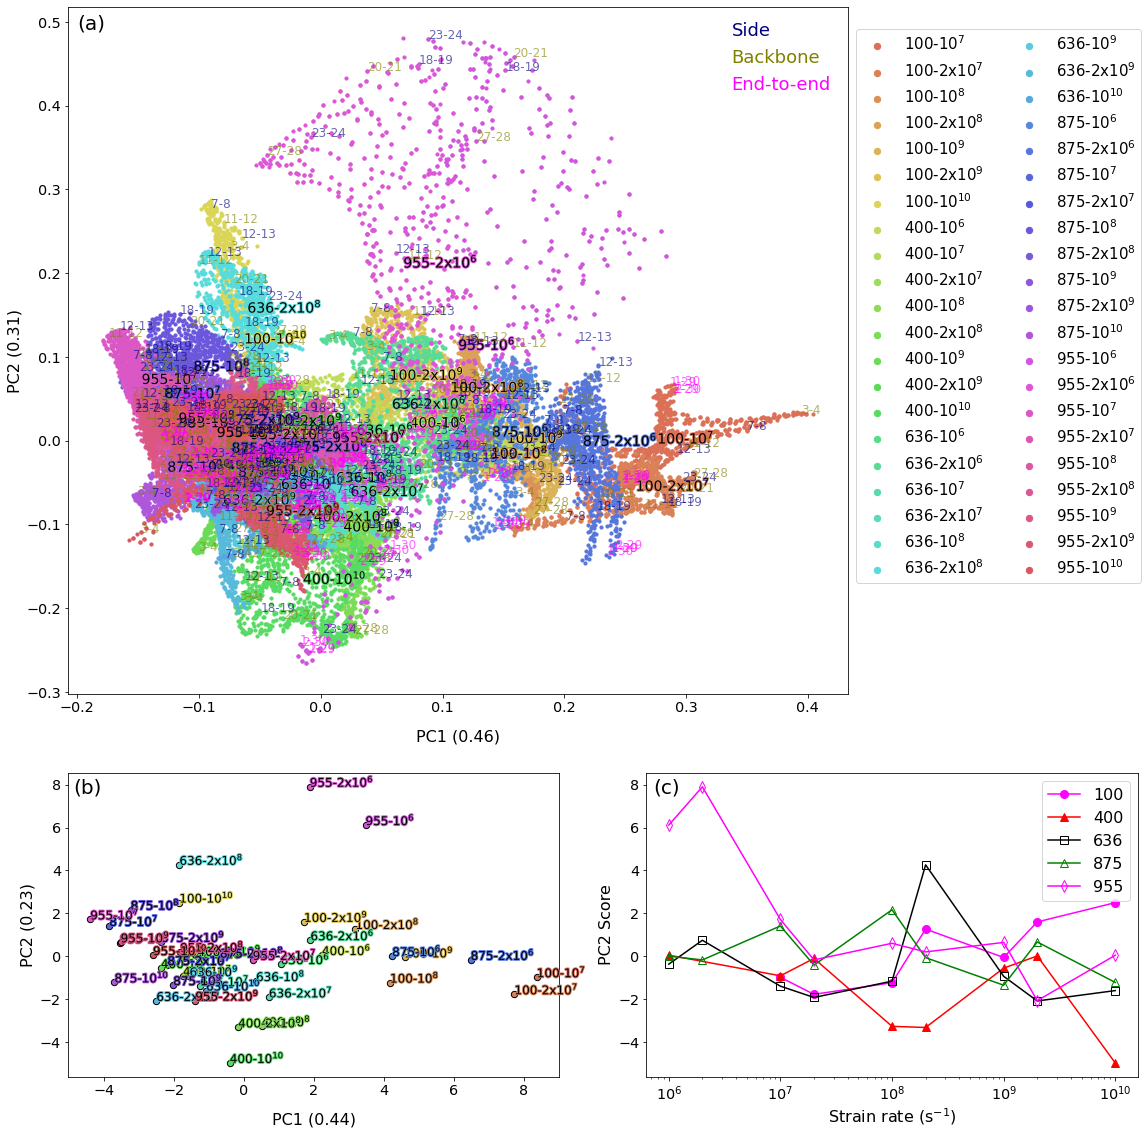

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from collections import defaultdict 

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,pair_wanted_all_indx.shape[0],6))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg).reshape(-1,6)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors))

    for i, label in enumerate(num_classes):
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, s=10)
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.6
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            #print("end end")
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[3], alpha=alpha)
        
 #-------------------------------------------------------------------------------------------

N_COL=2
N_ROW = 2
fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
ax = fig.axes

plot_indx= 0
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)
compute_angles_between_x_y_z_for_pc(pca.components_)

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
fig.legend(ncol=2, fontsize=15, markerscale=2, bbox_to_anchor=(1.0005, 0.97), loc='upper right', frameon=True) #loc='upper center', bbox_to_anchor=(0.5,0.85)

markersize_ = 10
legend_elements = [Line2D([0], [0], linestyle="None", marker='None', color=pair_colors[0], label='Side', markerfacecolor=pair_colors[0]),
                   #Line2D([0], [0], linestyle="None",marker='o', color=pair_colors[1],label='End', markerfacecolor=pair_colors[1]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[2],label='Backbone', markerfacecolor=pair_colors[2]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[3],label='End-to-end', markerfacecolor=pair_colors[3])
                  ]

legend2 = ax[plot_indx].legend(ncol=1, fontsize=18, markerscale=2, bbox_to_anchor=(0.765, 0.85), loc='lower left', frameon=False, handles=legend_elements) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
       
for line, text in zip(legend2.get_lines(), legend2.get_texts()):
    text.set_color(line.get_color())
    
plot_indx=1

#ax.legend()
ax[plot_indx].axis('off')
ax[plot_indx].get_xaxis().set_ticks([])
ax[plot_indx].get_yaxis().set_ticks([])
ax[plot_indx].axis('tight')

#--------------------------- Second plot-----------------------------------------------
pressure_list_ = ['100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,6*pair_wanted_all_indx.shape[0]))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=1,fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced


def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors)) #np.array(sns.color_palette("hls", total_colors))
    

    for i, label in enumerate(num_classes):
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, s=40, edgecolors='black')
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
               
#------------------------------------ Second plot-------------------------------------------------------
plot_indx= 2
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
tSNEResult = pca.fit_transform(arr_transformed)

print("-var ratio-" ,pca.explained_variance_ratio_)

plot_dict = {}
# break lables into pressure vs rates
for prss_ in  pressure_list_:
    results_ = []
    ylabels_ = []
    for i, key in enumerate(ylabel_text_reduced):
        pres_1 = key.split('P')[1].split('M')[0]
        sr_rate_1 = key.split('_')[1]
        if pres_1 == prss_:
            results_.append(tSNEResult[i,:])
            ylabels_.append(sr_rate_1)
    plot_dict[prss_] = [ylabels_, np.array(results_)]

print(tSNEResult.shape)
print(len(ylabel_text_reduced))

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
#fig.legend(ncol=2, fontsize=14, markerscale=2, bbox_to_anchor=(1.6, 1.05), loc='upper right', frameon=False) #loc='upper center', bbox_to_anchor=(0.5,0.85)

ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
#fig.tight_layout()

#----------------------------------C figure--------------------------------
plot_indx = 3
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-.','--', ':', '-']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
#markerstyles = ["o", "s", "^", "p"]
#markerstyles = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerstyles = ['o', '^', 's', '^', 'd', 'p']
markercolors = ['magenta', 'red', 'black', 'green', 'magenta', 'black']
markerstyles_fills = ['full', 'full', 'none', 'none', 'none', 'none']

colors = ['blue', 'black', 'green', 'red']
markersize=8.0

#fig, ax1 = plt.subplots()
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#ax.plot(x, p_spring, label='SHO', color=colors[0], linestyle=linestyles[0], marker= markerstyles[0], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_dw, label='DW', color=colors[2], linestyle=linestyles[2], marker= markerstyles[2], markerfacecolor='none', markersize=markersize)
#ax.plot(xlj,p_lj, label='LJ',color=colors[1], linestyle=linestyles[1], marker= markerstyles[1], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_rugged, label='Rugged', color=colors[3], linestyle=linestyles[3], marker= markerstyles[3], markerfacecolor='none', markersize=markersize)


#-----------------------------------------------------------

x_data_label_all = set()
for i, (key, value) in enumerate(plot_dict.items()):
    #print(key, value[0][0].split("sr")[-1])
    x_data = []
    x_data_labels = []
    y_data_1 = []
    y_data_2 = []
    label = key
    for rate, pcs in zip(value[:][0], value[:][1]):
        #print(key, rate.split("sr")[-1], pcs.shape)
        x_data.append(float(rate.split("sr")[-1]))
        x_data_label_all.add(rate.split("sr")[-1])
        y_data_1.append(pcs[0])
        y_data_2.append(pcs[1])
    
    ax[plot_indx].plot(x_data, y_data_2, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    #ax[1].plot(x_data, y_data_2, label=label, marker= markerstyles[i], markersize=markersize)
    
        
rates_sorted_flt = []
rates_sorted = []
for l_rates in sorted(list(x_data_label_all), key=alphanum_key_scientific):
    rates_sorted_flt.append(float(l_rates))
    rates_sorted.append(l_rates)  
        
        
#plt.plot(x, f_rugged, label='F(x)')
#ax[1].set_title("PC1")
#ax[1].set_title("PC2")
#ax[0].set_xticks(rates_sorted)
ax[plot_indx].set_xticks(rates_sorted_flt)
#ax[0].set_xticklabels(rates_sorted)
#ax[1].set_xticks(rates_sorted_flt)
ax[plot_indx].set_xscale('log')
#ax[1].set_xscale('log')
#ax[1].set_xticks(x_data_all, x_data_label_all)
ax[plot_indx].legend(fontsize=16, markerscale=1)
#ax[1].legend()
ax[plot_indx].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx].set_ylabel('PC2 Score', fontsize=fontsize_axis_labels)
ax[plot_indx].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].yaxis.set_tick_params(labelsize='x-large')
#ax[1].set_xlabel('Rate')
#ax[1].set_ylabel('PC2 Score')
#ax.set_ylabel('Potential Energy, U(x)')
#ax.set_ylim(-1.05,4)

fontsize_axis_labels=20
fig.text(0.03,0.975,"(a)",horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(b)",horizontalalignment='center', verticalalignment='center', transform = ax[2].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(c)",horizontalalignment='center', verticalalignment='center', transform = ax[3].transAxes, fontsize=fontsize_axis_labels)

fig.tight_layout(h_pad=2.7)


### t-SNE plot

(49, 2)
49


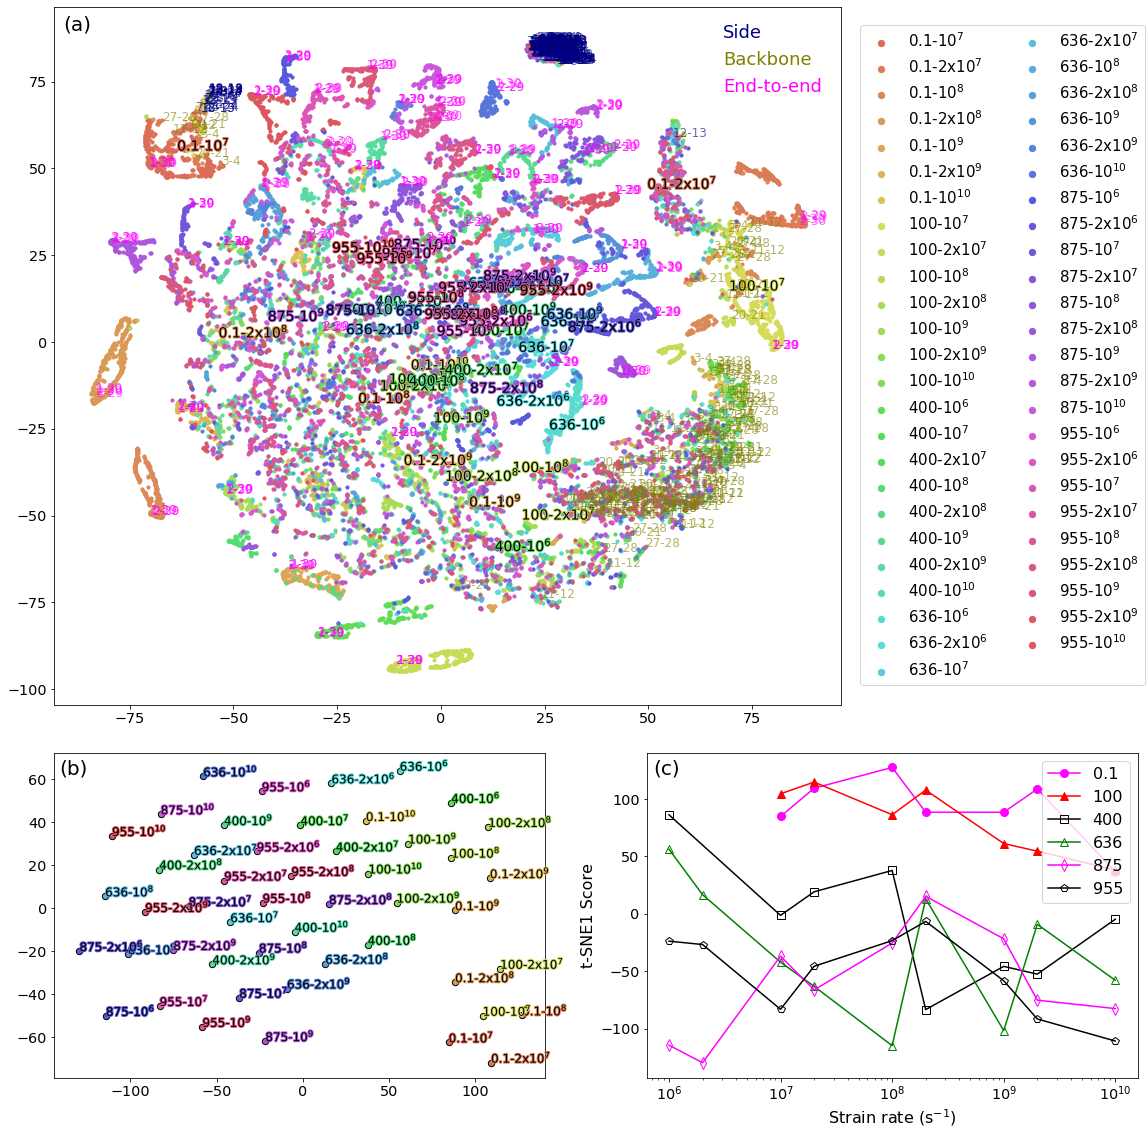

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from collections import defaultdict 

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,pair_wanted_all_indx.shape[0],6))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg).reshape(-1,6)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors))

    for i, label in enumerate(num_classes):
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, s=10)
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.6
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            #print("end end")
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=12, color=pair_colors[3], alpha=alpha)
        
 #-------------------------------------------------------------------------------------------

N_COL=2
N_ROW = 2
fig = plt.figure(figsize=(8*N_COL, 8*N_ROW))
ax1 = plt.subplot2grid((6, 8), (0, 0), colspan=6, rowspan=4)
ax2 = plt.subplot2grid((6, 8), (0, 6), colspan=2, rowspan=4)
ax3 = plt.subplot2grid((6, 8), (4, 0), colspan=4, rowspan=2)
ax4 = plt.subplot2grid((6, 8), (4, 4), colspan=4, rowspan=2)
ax = fig.axes

plot_indx= 0
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

#pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
#tSNEResult = pca.fit_transform(arr_transformed)
tsne = TSNE(n_components=2, random_state=0)#, perplexity=40, n_iter=2000)
tSNEResult = tsne.fit_transform(arr_transformed)

#print("-var ratio-" ,pca.explained_variance_ratio_)
#compute_angles_between_x_y_z_for_pc(pca.components_)

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
fig.legend(ncol=2, fontsize=15, markerscale=2, bbox_to_anchor=(1.0005, 0.97), loc='upper right', frameon=True) #loc='upper center', bbox_to_anchor=(0.5,0.85)

markersize_ = 10
legend_elements = [Line2D([0], [0], linestyle="None", marker='None', color=pair_colors[0], label='Side', markerfacecolor=pair_colors[0]),
                   #Line2D([0], [0], linestyle="None",marker='o', color=pair_colors[1],label='End', markerfacecolor=pair_colors[1]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[2],label='Backbone', markerfacecolor=pair_colors[2]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[3],label='End-to-end', markerfacecolor=pair_colors[3])
                  ]

legend2 = ax[plot_indx].legend(ncol=1, fontsize=18, markerscale=2, bbox_to_anchor=(0.765, 0.85), loc='lower left', frameon=False, handles=legend_elements) #loc='upper center', bbox_to_anchor=(0.5,0.85)

#ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
#ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
       
for line, text in zip(legend2.get_lines(), legend2.get_texts()):
    text.set_color(line.get_color())
    
plot_indx=1

#ax.legend()
ax[plot_indx].axis('off')
ax[plot_indx].get_xaxis().set_ticks([])
ax[plot_indx].get_yaxis().set_ticks([])
ax[plot_indx].axis('tight')

#--------------------------- Second plot-----------------------------------------------
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
#inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles
#-------------------------------------------------------------------------------------------
def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = set()
    color_list = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            name_list.add(key)
            
    color_list = sorted(list(name_list), key=alphanum_key_scientific)
    #print(color_list)
    return color_list, len(color_list)


def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx =get_far_apart_filter_indexes(atom_distance_low = 0.0, atom_distance_high = 15.0)
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in []:
                continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            value = value[-data_limit:,pair_wanted_all_indx,1:]
            value = np.reshape(value, (-1,6*pair_wanted_all_indx.shape[0]))
            #print(value.shape)
            #color_index = color_list[key.split("_sr")[1]]
            color_index = color_list.index(key)
            controlled_avg.append(np.mean(value, axis=0))
            ylabel_reduced.append(np.full(shape=1,fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.array(controlled_avg)
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced


def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    palette = np.array(sns.color_palette("hls", total_colors)) #np.array(sns.color_palette("hls", total_colors))
    

    for i, label in enumerate(num_classes):
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=label_cluster, s=40, edgecolors='black')
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.05, 0.95, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='x-large')
    ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        label_cluster = str(ylabel_text[i].split('MPa_sr')[0].split('P')[-1]) +"-"+str(get_label_for_rate(ylabel_text[i].split('MPa_sr')[-1]))
        #label_cluster = "*"
        txt = ax.text(xtext, ytext, str(label_cluster), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
               
#------------------------------------ Second plot-------------------------------------------------------
plot_indx= 2
data_limit = 1000
atom_distance = 0.0

color_list, total_colors = get_max_colors()
color_list_handles = defaultdict(list)

    
arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
# Here 2* SR is ignored as they are very near
arr_selected = arr_controlled[:,:] # Here features are all pairs* Sxx,Syy,..etc
ylabel_selected = ylabel_reduced
ylabel_text_selected = ylabel_text_reduced
pairlabel_selected = pairlabel_reduced
sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
#sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
#sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
#sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#arr_transformed = sc.fit_transform(arr_selected)
arr_transformed = arr_selected

#pca = PCA(n_components=2, random_state=0) #, whiten=True, svd_solver='full') 
#tSNEResult = pca.fit_transform(arr_transformed)
tsne = TSNE(n_components=2, random_state=0)#, perplexity=40, n_iter=2000)
tSNEResult = tsne.fit_transform(arr_transformed)

#print("-var ratio-" ,pca.explained_variance_ratio_)

plot_dict = {}
# break lables into pressure vs rates
for prss_ in  pressure_list_:
    results_ = []
    ylabels_ = []
    for i, key in enumerate(ylabel_text_reduced):
        pres_1 = key.split('P')[1].split('M')[0]
        sr_rate_1 = key.split('_')[1]
        if pres_1 == prss_:
            results_.append(tSNEResult[i,:])
            ylabels_.append(sr_rate_1)
    plot_dict[prss_] = [ylabels_, np.array(results_)]

print(tSNEResult.shape)
print(len(ylabel_text_reduced))

titleText=""
    
scatterPlot_axis(ax[plot_indx], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
#ax[index_j].legend()
#for label_, handle in zip(ax.get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
#    color_list_handles[label_]=handle
    
#fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
#fig.legend(ncol=2, fontsize=14, markerscale=2, bbox_to_anchor=(1.6, 1.05), loc='upper right', frameon=False) #loc='upper center', bbox_to_anchor=(0.5,0.85)

#ax[plot_indx].set_xlabel('PC1 ' + "({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=fontsize_axis_labels, labelpad=15)
#ax[plot_indx].set_ylabel('PC2 '+ "({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=fontsize_axis_labels)
#fig.tight_layout()

#----------------------------------C figure--------------------------------
plot_indx = 3
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-.','--', ':', '-']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
#markerstyles = ["o", "s", "^", "p"]
#markerstyles = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerstyles = ['o', '^', 's', '^', 'd', 'p']
markercolors = ['magenta', 'red', 'black', 'green', 'magenta', 'black']
markerstyles_fills = ['full', 'full', 'none', 'none', 'none', 'none']

colors = ['blue', 'black', 'green', 'red']
markersize=8.0

#fig, ax1 = plt.subplots()
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#ax.plot(x, p_spring, label='SHO', color=colors[0], linestyle=linestyles[0], marker= markerstyles[0], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_dw, label='DW', color=colors[2], linestyle=linestyles[2], marker= markerstyles[2], markerfacecolor='none', markersize=markersize)
#ax.plot(xlj,p_lj, label='LJ',color=colors[1], linestyle=linestyles[1], marker= markerstyles[1], markerfacecolor='none', markersize=markersize)
#ax.plot(x, p_rugged, label='Rugged', color=colors[3], linestyle=linestyles[3], marker= markerstyles[3], markerfacecolor='none', markersize=markersize)


#-----------------------------------------------------------

x_data_label_all = set()
for i, (key, value) in enumerate(plot_dict.items()):
    #print(key, value[0][0].split("sr")[-1])
    x_data = []
    x_data_labels = []
    y_data_1 = []
    y_data_2 = []
    label = key
    for rate, pcs in zip(value[:][0], value[:][1]):
        #print(key, rate.split("sr")[-1], pcs.shape)
        x_data.append(float(rate.split("sr")[-1]))
        x_data_label_all.add(rate.split("sr")[-1])
        y_data_1.append(pcs[0])
        y_data_2.append(pcs[1])
    
    ax[plot_indx].plot(x_data, y_data_1, label=label, marker= markerstyles[i], 
                       markersize=markersize,  fillstyle=markerstyles_fills[i], color=markercolors[i])
    #ax[1].plot(x_data, y_data_2, label=label, marker= markerstyles[i], markersize=markersize)
    
        
rates_sorted_flt = []
rates_sorted = []
for l_rates in sorted(list(x_data_label_all), key=alphanum_key_scientific):
    rates_sorted_flt.append(float(l_rates))
    rates_sorted.append(l_rates)  
        
        
#plt.plot(x, f_rugged, label='F(x)')
#ax[1].set_title("PC1")
#ax[1].set_title("PC2")
#ax[0].set_xticks(rates_sorted)
ax[plot_indx].set_xticks(rates_sorted_flt)
#ax[0].set_xticklabels(rates_sorted)
#ax[1].set_xticks(rates_sorted_flt)
ax[plot_indx].set_xscale('log')
#ax[1].set_xscale('log')
#ax[1].set_xticks(x_data_all, x_data_label_all)
ax[plot_indx].legend(fontsize=16, markerscale=1)
#ax[1].legend()
ax[plot_indx].set_xlabel('Strain rate ($\mathrm{s}^{-1}$)', fontsize=fontsize_axis_labels)
ax[plot_indx].set_ylabel('t-SNE1 Score', fontsize=fontsize_axis_labels)
ax[plot_indx].xaxis.set_tick_params(labelsize='x-large')
ax[plot_indx].yaxis.set_tick_params(labelsize='x-large')
#ax[1].set_xlabel('Rate')
#ax[1].set_ylabel('PC2 Score')
#ax.set_ylabel('Potential Energy, U(x)')
#ax.set_ylim(-1.05,4)

fontsize_axis_labels=20
fig.text(0.03,0.975,"(a)",horizontalalignment='center', verticalalignment='center', transform = ax[0].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(b)",horizontalalignment='center', verticalalignment='center', transform = ax[2].transAxes, fontsize=fontsize_axis_labels)
fig.text(0.04,0.95,"(c)",horizontalalignment='center', verticalalignment='center', transform = ax[3].transAxes, fontsize=fontsize_axis_labels)

fig.tight_layout(h_pad=2.7)
